**Maestría:**

Ciencia de Datos y Máquinas de Aprendizaje

**Asignatura:**

Neural Networks: Deep Learning

**Integrantes:**

*   Freddy Lituma Perero
*   Ivan Ortega Salas
*   Juan Suárez León
*   Eleanor Varela Tapia

# Carga de datos

In [275]:
# Librerías

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

Dataset https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data

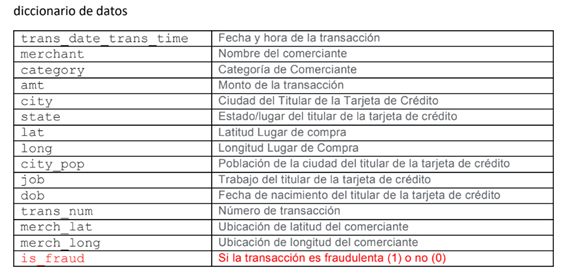

In [2]:
# Carga dataset de https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eleanorvarela","key":"b3c2acdca9667f757c655afb74c4444f"}'}

In [4]:
# Crea a directory named kaggle and move kaggle.json file into it
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Cambia los permisos del archivo
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Descarga el dataset
!kaggle datasets download -d neharoychoudhury/credit-card-fraud-data

Dataset URL: https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data
License(s): MIT
  0% 0.00/839k [00:00<?, ?B/s]
100% 839k/839k [00:00<00:00, 126MB/s]


In [6]:
# Descomprime the dataset
!unzip credit-card-fraud-data.zip

Archive:  credit-card-fraud-data.zip
  inflating: fraud_data.csv          


In [196]:
# Carga los datos usando Pandas
df = pd.read_csv('fraud_data.csv')
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


# Preprocesamiento de Datos

In [8]:
# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [197]:
# Convierte 'is_fraud' en int
df['is_fraud'] = df['is_fraud'].astype(str).str.extract(r'(\d)').fillna(0).astype(int)

In [11]:
# Información del dataframe con los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  int64  
dtypes:

In [12]:
# tamaño de df
df.shape

(14446, 15)

In [13]:
# Verificar registros nulos
print(df.isna().sum())

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [14]:
# Verificar registros nulos
print(df.isnull().sum())

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [15]:
# verificar registros con el valor de 0
for column in df.columns:
  print(f"Columna '{column}' tiene {df[df[column] == 0].shape[0]} filas con valor 0.")

Columna 'trans_date_trans_time' tiene 0 filas con valor 0.
Columna 'merchant' tiene 0 filas con valor 0.
Columna 'category' tiene 0 filas con valor 0.
Columna 'amt' tiene 0 filas con valor 0.
Columna 'city' tiene 0 filas con valor 0.
Columna 'state' tiene 0 filas con valor 0.
Columna 'lat' tiene 0 filas con valor 0.
Columna 'long' tiene 0 filas con valor 0.
Columna 'city_pop' tiene 0 filas con valor 0.
Columna 'job' tiene 0 filas con valor 0.
Columna 'dob' tiene 0 filas con valor 0.
Columna 'trans_num' tiene 0 filas con valor 0.
Columna 'merch_lat' tiene 0 filas con valor 0.
Columna 'merch_long' tiene 0 filas con valor 0.
Columna 'is_fraud' tiene 12601 filas con valor 0.


In [37]:
# Verificar filas con valores nulos en cada columna
for column in df.columns:
  null_rows = df[df[column].isnull()]
  if not null_rows.empty:
    print(f"Column '{column}' has null values in the following rows:")
    print(null_rows)

In [40]:
# Contar filas duplicadas en df
duplicate_rows = df[df.duplicated()]
print("Filas duplicadas:", duplicate_rows.shape[0])


Filas duplicadas: 63


In [41]:
# Mostrar duplicados filas de df
duplicate_rows = df[df.duplicated()]
print("Filas duplicadas:")
duplicate_rows

Filas duplicadas:


,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
8725,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
8857,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
8964,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
8972,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
8982,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13261,18-01-2019 14:38,Shanahan-Lehne,personal_care,21.54,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,ce3b2734ce646ef6a47b3484a8e043e5,38.211376,-109.986757,1
13372,18-01-2019 22:06,Beier LLC,entertainment,528.98,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,3417f366e2e1d5dd25a3a89a3aae9f3d,39.164469,-109.933543,1
13376,18-01-2019 22:12,Bartoletti and Sons,personal_care,21.23,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,2df9fa2d0e508ed2a83aa3ac6f4b5d5a,38.998205,-110.005615,1
13392,18-01-2019 23:16,Ankunding-Carroll,travel,9.33,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,a0ed41246d201717db7250fa2375c73b,39.230640,-108.990363,1


In [198]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

In [199]:
# Corroborando que ya no hay duplicados de filas de df
duplicate_rows = df[df.duplicated()]
print("Filas duplicadas:")
print(duplicate_rows)

Filas duplicadas:
Empty DataFrame
Columns: [trans_date_trans_time, merchant, category, amt, city, state, lat, long, city_pop, job, dob, trans_num, merch_lat, merch_long, is_fraud]
Index: []


In [44]:
# Verificar duplicados en columnas de df
duplicate_columns = df.columns[df.T.duplicated()]
print("Columnas duplicadas:", duplicate_columns)


Columnas duplicadas: Index([], dtype='object')


In [21]:
# Verificando nuevo tamaño de df
df.shape

(14383, 15)

In [200]:
# Convierte 'dob' y 'trans_date_trans_time' a formato datetime
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

In [201]:
# Extrae date, time en columnas separadas
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

In [48]:
# Mostrando un registro de df['trans_date']
df['trans_date'].head(1)

,trans_date
0,2019-01-04


In [49]:
# Mostrando un registro de df['trans_time']
df['trans_time'].head(1)

,trans_time
0,00:58:00


In [202]:
# Calcula la edad directamente de la resta del año de trans_date
df['age'] = df['trans_date'].apply(lambda x: x.year) - df['dob'].dt.year

In [203]:
# Extrayendo hour, day, month, year, day_of_week de transaction
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day_of_month'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['transaction_year'] = df['trans_date_trans_time'].dt.year
df['transaction_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

In [52]:
# Información de df
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   trans_date_trans_time     14383 non-null  datetime64[ns]
 1   merchant                  14383 non-null  object        
 2   category                  14383 non-null  object        
 3   amt                       14383 non-null  float64       
 4   city                      14383 non-null  object        
 5   state                     14383 non-null  object        
 6   lat                       14383 non-null  float64       
 7   long                      14383 non-null  float64       
 8   city_pop                  14383 non-null  int64         
 9   job                       14383 non-null  object        
 10  dob                       14383 non-null  datetime64[ns]
 11  trans_num                 14383 non-null  object        
 12  merch_lat              

In [204]:
# Columnas numéricas de df
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,transaction_hour,transaction_day_of_month,transaction_month,transaction_year,transaction_day_of_week
0,14.37,64.7556,-165.6723,145,65.654142,-164.722603,1,80,0,4,1,2019,4
1,966.11,64.7556,-165.6723,145,65.468863,-165.473127,1,80,15,4,1,2019,4
2,49.61,64.7556,-165.6723,145,65.347667,-165.914542,1,80,22,4,1,2019,4
3,295.26,64.7556,-165.6723,145,64.445035,-166.080207,1,80,23,4,1,2019,4
4,18.17,64.7556,-165.6723,145,65.447094,-165.446843,1,80,23,4,1,2019,4


In [54]:
print(numeric_columns.columns)

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'transaction_hour', 'transaction_day_of_month',
       'transaction_month', 'transaction_year', 'transaction_day_of_week'],
      dtype='object')


In [55]:
# Estadística descriptiva
df.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
amt,14383.0,122.719068,228.879064,1.000000,11.945000,51.290000,100.140000,3.261470e+03
lat,14383.0,39.761571,5.266532,20.027100,36.715400,39.666200,41.940400,6.669330e+01
long,14383.0,-110.835395,12.877931,-165.672300,-120.282400,-111.098500,-101.136000,-8.962870e+01
city_pop,14383.0,106392.139331,290043.858658,46.000000,493.000000,1645.000000,35439.000000,2.383912e+06
merch_lat,14383.0,39.761755,5.309190,19.032689,36.768908,39.613766,42.275391,6.751027e+01
merch_long,14383.0,-110.836186,12.887765,-166.670685,-120.095775,-111.203646,-100.556920,-8.864637e+01
is_fraud,14383.0,0.123896,0.329475,0.000000,0.000000,0.000000,0.000000,1.000000e+00
age,14383.0,48.066954,17.171371,18.000000,34.000000,46.000000,59.000000,9.300000e+01
transaction_hour,14383.0,13.026351,7.278883,0.000000,7.000000,14.000000,20.000000,2.300000e+01
transaction_day_of_month,14383.0,18.656261,9.561527,1.000000,10.000000,20.000000,28.000000,3.100000e+01


In [205]:
# Elimna columnas que no aportan al modelo
df = df.drop(columns=['dob'])

In [57]:
# Actualización de Información df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 0 to 14445
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   trans_date_trans_time     14383 non-null  datetime64[ns]
 1   merchant                  14383 non-null  object        
 2   category                  14383 non-null  object        
 3   amt                       14383 non-null  float64       
 4   city                      14383 non-null  object        
 5   state                     14383 non-null  object        
 6   lat                       14383 non-null  float64       
 7   long                      14383 non-null  float64       
 8   city_pop                  14383 non-null  int64         
 9   job                       14383 non-null  object        
 10  trans_num                 14383 non-null  object        
 11  merch_lat                 14383 non-null  float64       
 12  merch_long             

# EDA

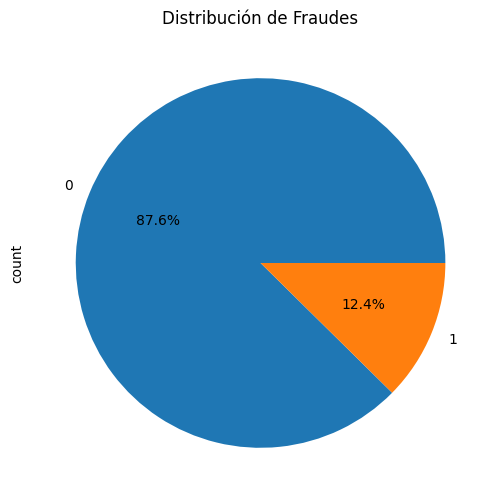

In [58]:
# Gráfico de pastel de la variable 'is_fraud'
df['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Distribución de Fraudes')
plt.show()

In [59]:
# Cantidad de registros 'is_fraud'
df['is_fraud'].value_counts()

,count
is_fraud,
0,12601
1,1782


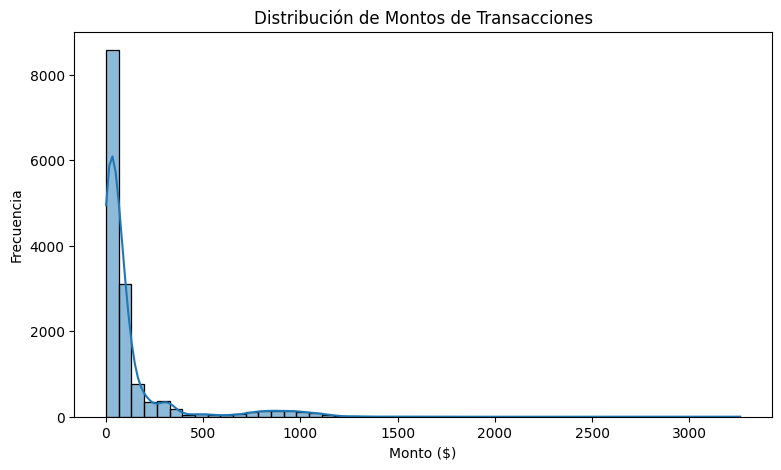

In [103]:
# Distribucción de montos de transacciones
plt.figure(figsize=(9,5))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribución de Montos de Transacciones')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')
plt.show()

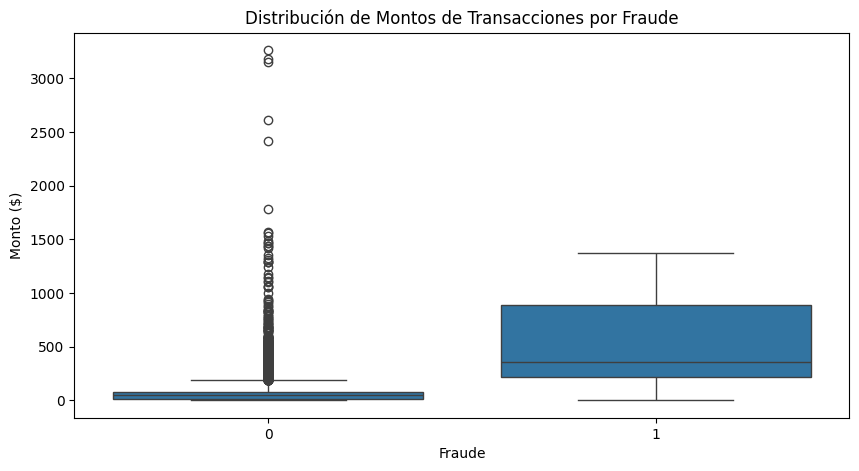

In [61]:
# Distribución de Montos de Transacciones por Fraude
plt.figure(figsize=(10,5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Distribución de Montos de Transacciones por Fraude')
plt.xlabel('Fraude')
plt.ylabel('Monto ($)')
plt.show()

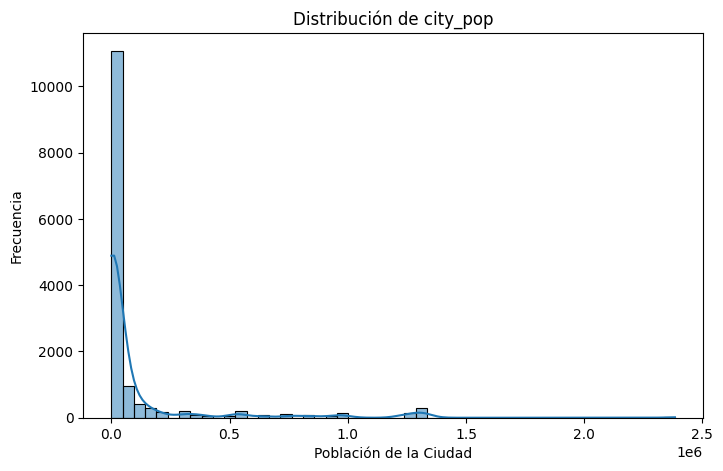

In [101]:
# Gráfica de distribución de city_pop
plt.figure(figsize=(8, 5))
sns.histplot(df['city_pop'], bins=50, kde=True)
plt.title('Distribución de city_pop')
plt.xlabel('Población de la Ciudad')
plt.ylabel('Frecuencia')
plt.show()

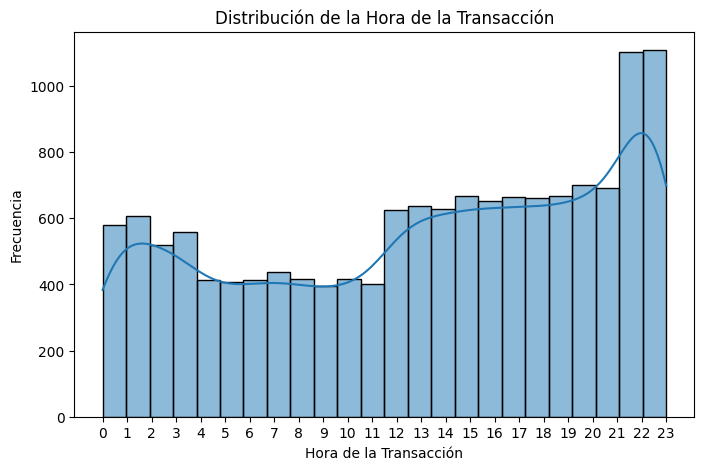

In [105]:
# Gráfica de distribución de transaction_hour
plt.figure(figsize=(8, 5))
sns.histplot(df['transaction_hour'], bins=24, kde=True)
plt.title('Distribución de la Hora de la Transacción')
plt.xlabel('Hora de la Transacción')
plt.ylabel('Frecuencia')
plt.xticks(range(24))  # Mostrar todas las horas en el eje x
plt.show()

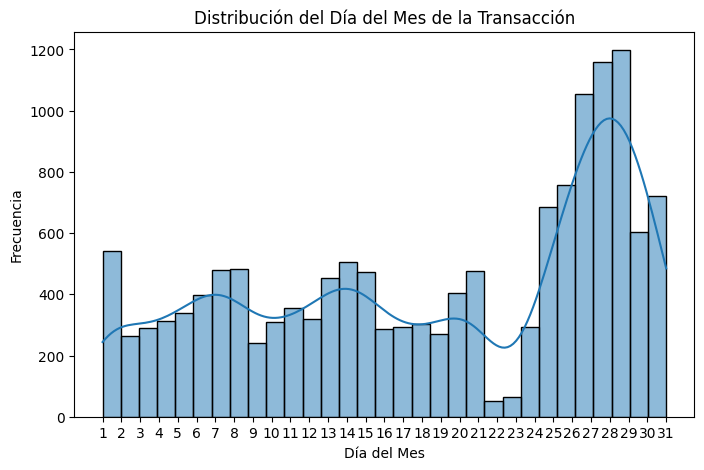

In [107]:
# Gráfica de distribución de transaction_day_of_month
plt.figure(figsize=(8, 5))
sns.histplot(df['transaction_day_of_month'], bins=31, kde=True)
plt.title('Distribución del Día del Mes de la Transacción')
plt.xlabel('Día del Mes')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 32))  # Mostrar todos los días del mes en el eje x
plt.show()

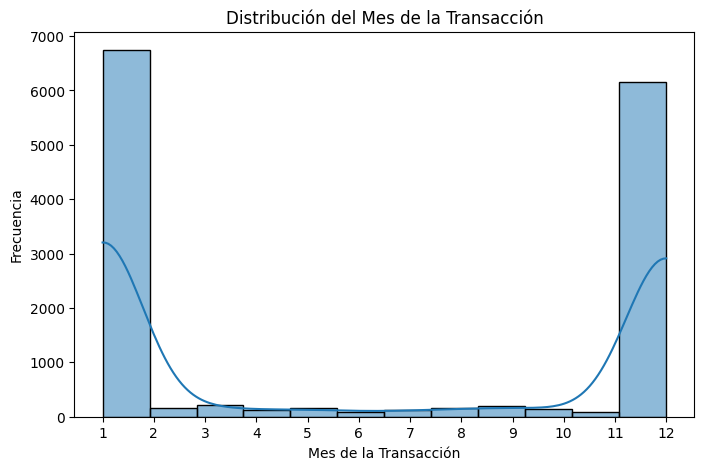

In [108]:
# Gráfica de distribución de transaction_month
plt.figure(figsize=(8, 5))
sns.histplot(df['transaction_month'], bins=12, kde=True)
plt.title('Distribución del Mes de la Transacción')
plt.xlabel('Mes de la Transacción')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 13))  # Mostrar todos los meses en el eje x
plt.show()

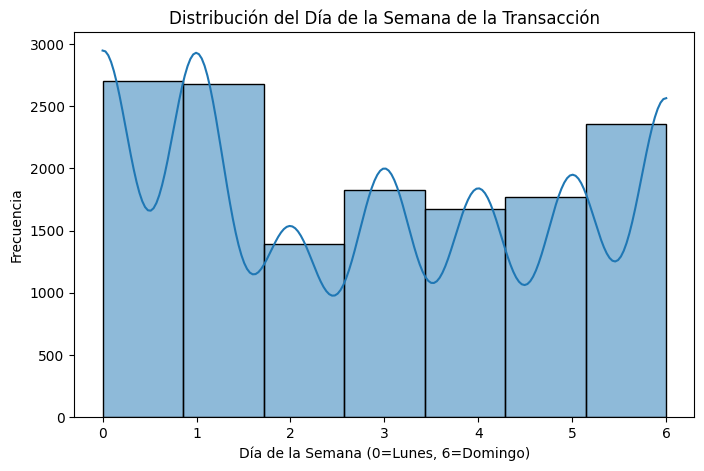

In [110]:
# Grafica de distribución de transaction_day_of_week en df
plt.figure(figsize=(8, 5))
sns.histplot(df['transaction_day_of_week'], bins=7, kde=True)
plt.title('Distribución del Día de la Semana de la Transacción')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Frecuencia')
plt.xticks(range(7))  # Mostrar todos los días de la semana en el eje x
plt.show()

In [161]:
# Muestra los valores de category en df
df['category'].unique()

array(['grocery_net', 'shopping_net', 'misc_pos', 'grocery_pos',
       'health_fitness', 'gas_transport', 'misc_net', 'kids_pets',
       'shopping_pos', 'entertainment', 'food_dining', 'home',
       'personal_care', 'travel'], dtype=object)

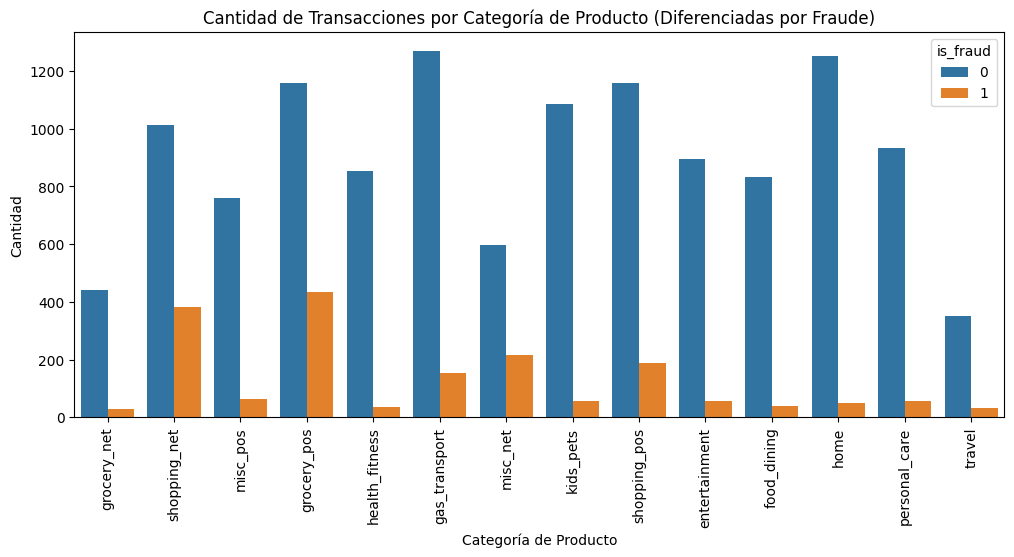

In [62]:
# Transacciones por Categoría de Producto (category)
import warnings
# Suprimir la advertencia de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(12,5))
sns.countplot(x='category', hue='is_fraud', data=df)
plt.title('Cantidad de Transacciones por Categoría de Producto (Diferenciadas por Fraude)')
plt.xticks(rotation=90)
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad')
plt.show()

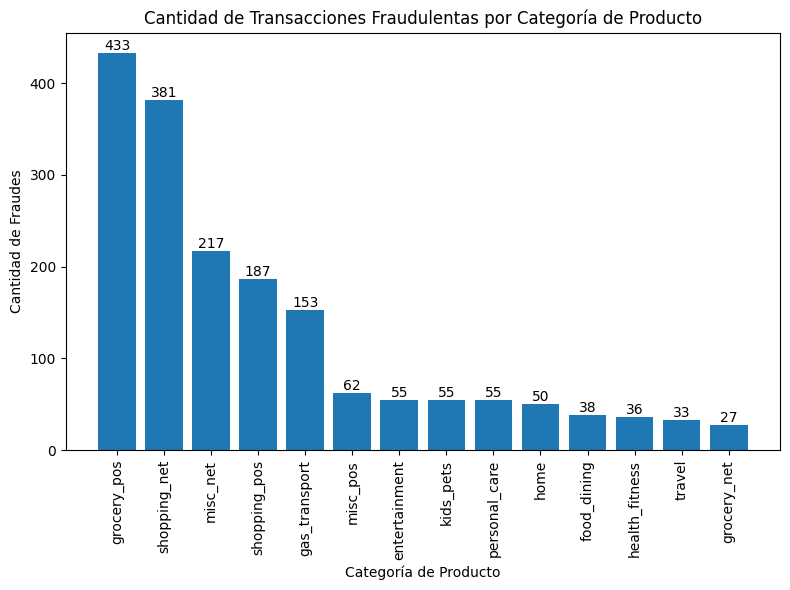

In [112]:
# Agrupa por categoría y suma las transacciones, ordenando por la cantidad de fraudes
category_counts = df.groupby('category')['is_fraud'].sum().sort_values(ascending=False)

# Crea la gráfica de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(category_counts.index, category_counts.values)

# Agrega las cantidades encima de cada barra
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Cantidad de Transacciones Fraudulentas por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad de Fraudes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

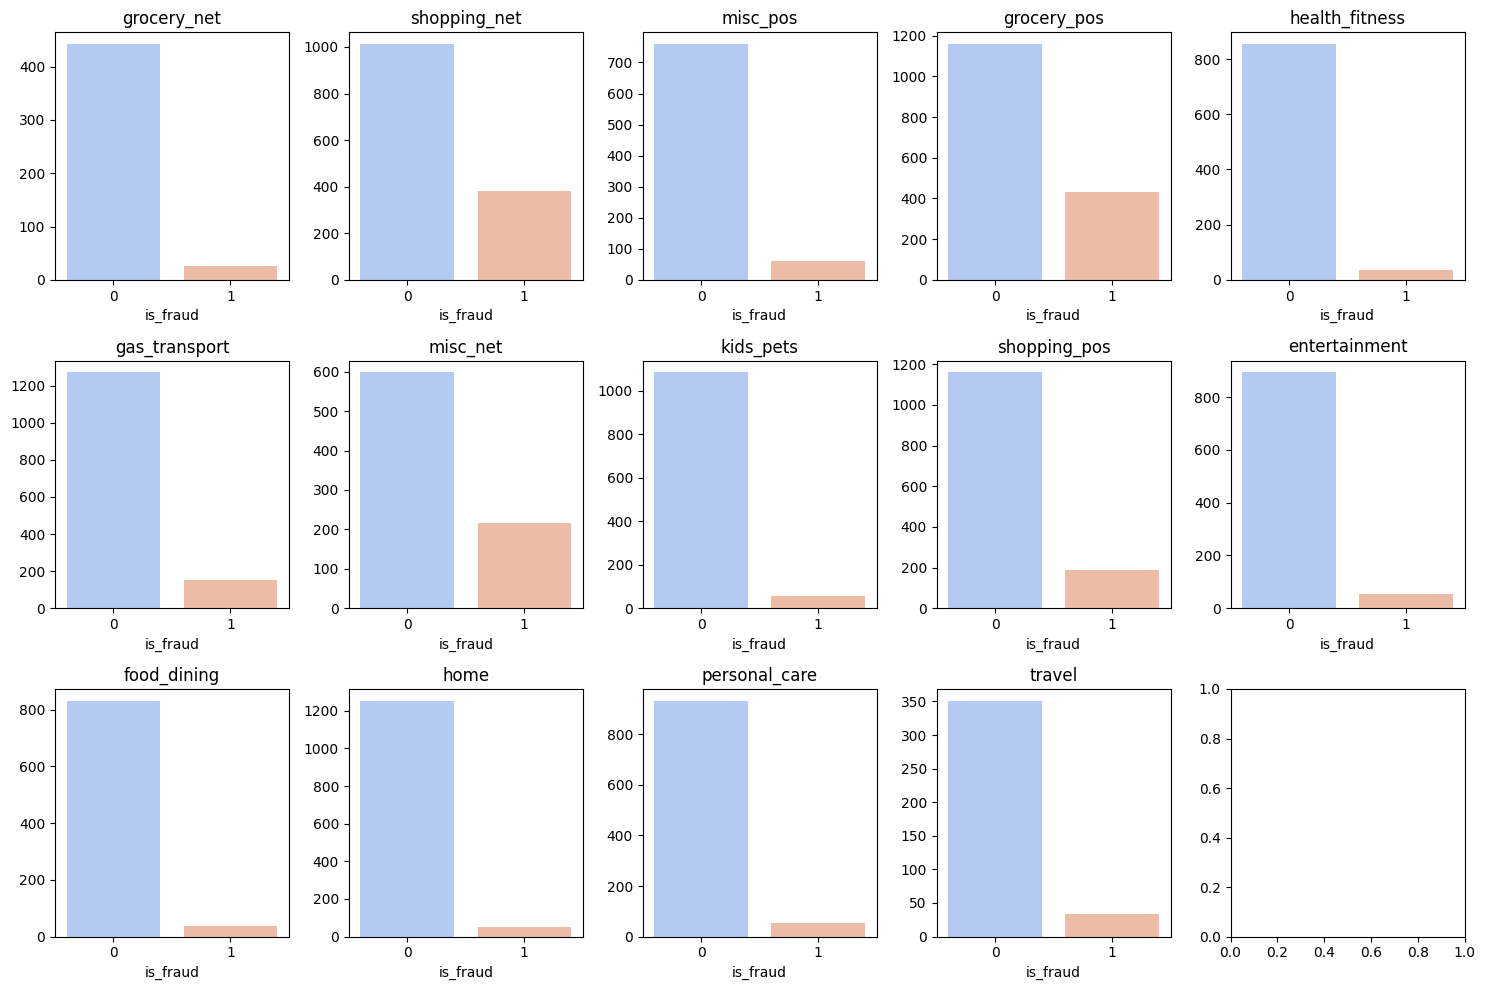

In [65]:
# Diagrama de barras por cada categoría de producto y fraude
fig, ax = plt.subplots(3, 5, figsize=(15, 10))  # Adjust figsize as needed
ax = ax.flatten()  # Flatten the 2D array to 1D for easy indexing

for i, col in enumerate(df['category'].unique()):
    sns.barplot(
        x=df[df['category'] == col]['is_fraud'].value_counts().index,
        y=df[df['category'] == col]['is_fraud'].value_counts().values,
        ax=ax[i],
        palette='coolwarm',
        color='green'
    )
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

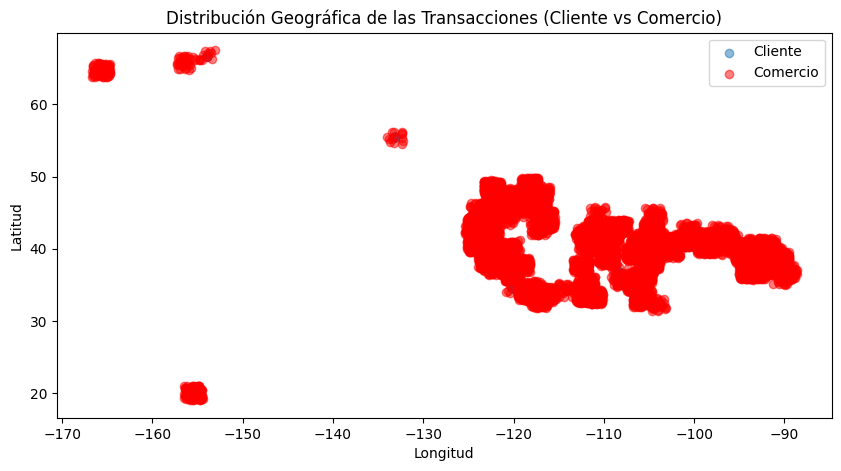

In [66]:
# Distribución Geográfica de las Transacciones Cliente vs Comercio
plt.figure(figsize=(10,5))
plt.scatter(df['long'], df['lat'], alpha=0.5, label='Cliente')
plt.scatter(df['merch_long'], df['merch_lat'], alpha=0.5, label='Comercio', color='r')
plt.title('Distribución Geográfica de las Transacciones (Cliente vs Comercio)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

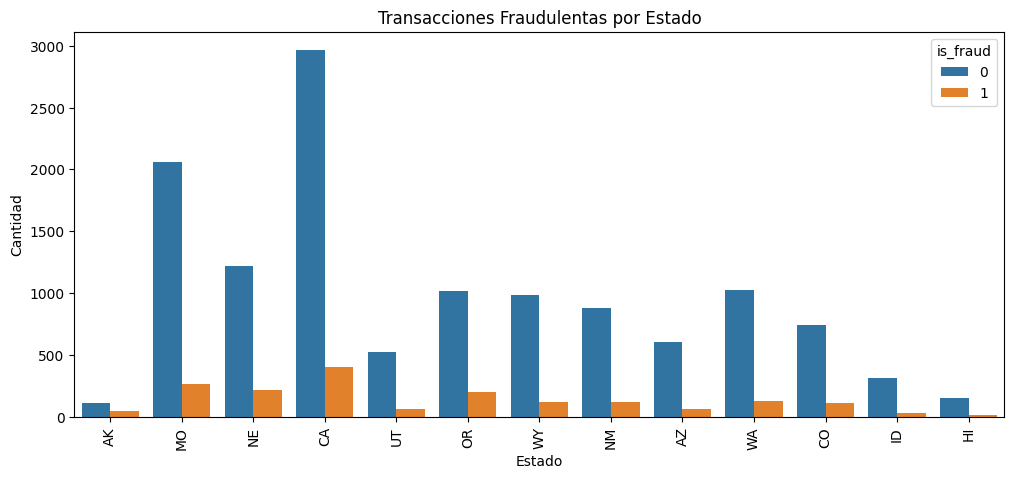

In [67]:
# Distribución de Fraude por Estado
plt.figure(figsize=(12,5))
sns.countplot(x='state', hue='is_fraud', data=df)
plt.title('Transacciones Fraudulentas por Estado')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

In [206]:
# Crear un diccionario de estados y sus nombres completos
state_mapping = {
    'GA': 'Georgia',
    'KS': 'Kansas',
    'WV': 'West Virginia',
    'PA': 'Pennsylvania',
    'MA': 'Massachusetts',
    'TX': 'Texas',
    'CA': 'California',
    'IL': 'Illinois',
    'NY': 'New York',
    'FL': 'Florida',
    'MD': 'Maryland',
    'CO': 'Colorado',
    'OH': 'Ohio',
    'NC': 'North Carolina',
    'VA': 'Virginia',
    'WA': 'Washington',
    'NJ': 'New Jersey',
    'MN': 'Minnesota',
    'MI': 'Michigan',
    'NM': 'New Mexico',
    'OR': 'Oregon',
    'MO': 'Missouri',
    'IN': 'Indiana',
    'WI': 'Wisconsin',
    'CT': 'Connecticut',
    'OK': 'Oklahoma',
    'AZ': 'Arizona',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'AL': 'Alabama',
    'NE': 'Nebraska',
    'UT': 'Utah',
    'ID': 'Idaho',
    'RI': 'Rhode Island',
    'SD': 'South Dakota',
    'IA': 'Iowa',
    'NH': 'New Hampshire',
    'ME': 'Maine',
    'VT': 'Vermont',
    'DE': 'Delaware',
    'AK': 'Alaska',
    'MT': 'Montana',
    'AR': 'Arkansas',
    'MS': 'Mississippi',
    'ND': 'North Dakota',
    'WY': 'Wyoming',
    'SC': 'South Carolina',
    'NV': 'Nevada',
    'DC': 'District of Columbia',
    'HI': 'Hawaii',
    'TN': 'Tennessee',
    'MD': 'Maryland'
}

# Reemplazar los códigos de estado con sus nombres completos
df['state'] = df['state'].map(state_mapping)

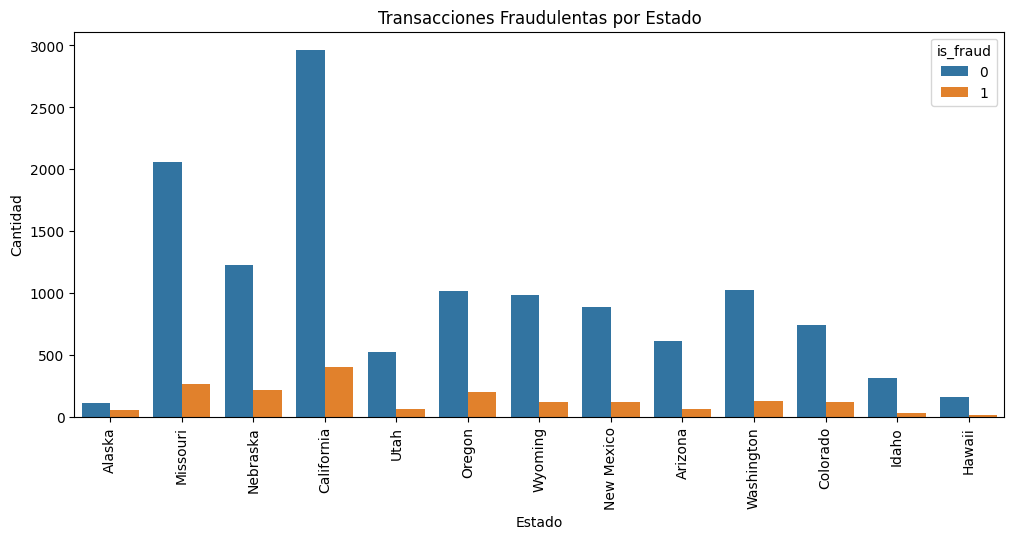

In [207]:
# Distribución de Fraude por Estado
plt.figure(figsize=(12,5))
sns.countplot(x='state', hue='is_fraud', data=df)
plt.title('Transacciones Fraudulentas por Estado')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

In [91]:
# Agrupa por estado y suma las transacciones fraudulentas
fraud_by_state = df[df['is_fraud'] == 1].groupby('state')['is_fraud'].count()

# Crea el gráfico de barras con Plotly
fig = go.Figure(data=[go.Bar(x=fraud_by_state.index, y=fraud_by_state.values)])

# Agrega la cantidad encima de cada barra
fig.update_traces(text=fraud_by_state.values, textposition='outside')

# Personaliza el diseño del gráfico
fig.update_layout(title='Transacciones Fraudulentas por Estado',
                  xaxis_title='Estado',
                  yaxis_title='Cantidad de Transacciones Fraudulentas',
                  xaxis={'categoryorder':'total descending'}) # Ordena por cantidad

fig.show()

In [71]:
# Cantidad de estados en df
df['state'].nunique()

13

In [72]:
# Cantidad de ciudades en df
df['city'].nunique()

176

In [73]:
# Cantidad de fraudes por estados en df
df[df['is_fraud'] == 1]['state'].value_counts()

,count
state,
California,402
Missouri,262
Nebraska,216
Oregon,197
Washington,126
New Mexico,121
Wyoming,119
Colorado,115
Arizona,64


In [74]:
# Filtrando transaciones fraudulentas, agrupados por estado
frauds_by_state = df[df['is_fraud'] == 1].groupby('state').size().reset_index(name='fraud_count')
# Agrupando datos
merged_df = df.groupby('state').size().reset_index(name='total_transactions').merge(frauds_by_state, on='state', how='left')
# Mostrando
merged_df.sort_values(by='fraud_count', ascending=False, inplace=True)
merged_df


,state,total_transactions,fraud_count
2,California,3366,402
6,Missouri,2324,262
7,Nebraska,1438,216
9,Oregon,1211,197
11,Washington,1150,126
8,New Mexico,1003,121
12,Wyoming,1100,119
3,Colorado,856,115
1,Arizona,673,64
10,Utah,585,61


In [75]:
# Filtrando transaciones no fraudulentas, agrupados por estado
no_frauds_by_state = df[df['is_fraud'] == 0].groupby('state').size().reset_index(name='no_fraud_count')
# Agrupando datos
merged_df = df.groupby('state').size().reset_index(name='total_transactions').merge(no_frauds_by_state, on='state', how='left')
# Mostrando
merged_df.sort_values(by='no_fraud_count', ascending=False, inplace=True)
merged_df

,state,total_transactions,no_fraud_count
2,California,3366,2964
6,Missouri,2324,2062
7,Nebraska,1438,1222
11,Washington,1150,1024
9,Oregon,1211,1014
12,Wyoming,1100,981
8,New Mexico,1003,882
3,Colorado,856,741
1,Arizona,673,609
10,Utah,585,524


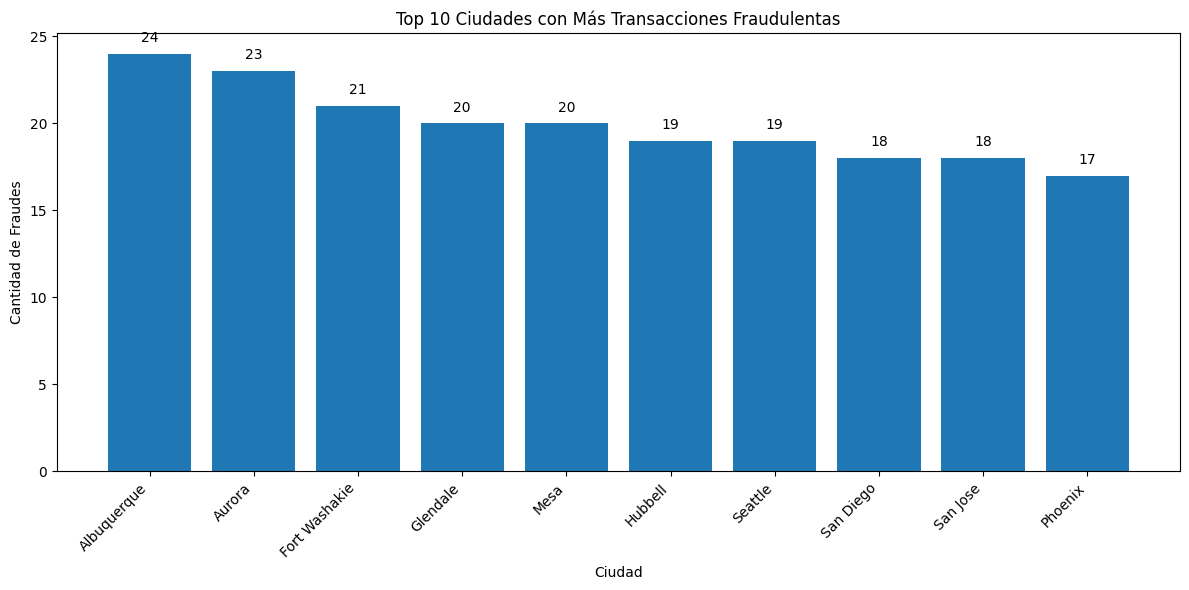

In [115]:
# Agrupa las transacciones por ciudad y calcula la cantidad de transacciones fraudulentas
fraud_counts_by_city = df.groupby('city')['is_fraud'].sum().sort_values(ascending=False)

# Selecciona las 10 ciudades con más fraude
top_10_fraud_cities = fraud_counts_by_city.head(10)

# Crea el gráfico de barras ordenado por cantidad
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura
bars = plt.bar(top_10_fraud_cities.index, top_10_fraud_cities.values)
plt.title('Top 10 Ciudades con Más Transacciones Fraudulentas')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Fraudes')

# Agrega etiquetas de valor encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom') # Ajusta la posición vertical de la etiqueta

plt.tight_layout() # Ajusta el espaciado para evitar que las etiquetas se superpongan
plt.show()

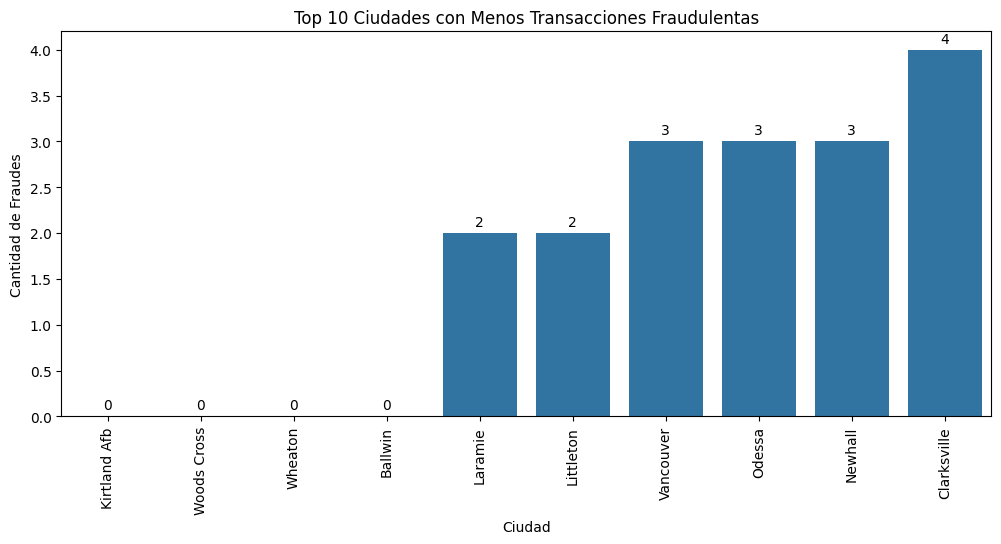

In [116]:
# Agrupa las transacciones por ciudad y calcula la cantidad de transacciones fraudulentas
fraud_counts_by_city = df.groupby('city')['is_fraud'].sum().sort_values(ascending=True)

# Selecciona las 10 ciudades con menos fraude
bottom_10_fraud_cities = fraud_counts_by_city.head(10)

# Crea el gráfico de barras ordenado por cantidad
plt.figure(figsize=(12, 5))
bars = sns.barplot(x=bottom_10_fraud_cities.index, y=bottom_10_fraud_cities.values)
plt.title('Top 10 Ciudades con Menos Transacciones Fraudulentas')
plt.xticks(rotation=90)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Fraudes')

# Mostrar la cantidad encima de cada barra
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

In [93]:
# Filtrando transacciones fraudulentas por ciudad
fraud_counts_by_city = df[df['is_fraud'] == 1].groupby('city').size().reset_index(name='fraud_count')
# Agrupado datos
merged_df = df.groupby('city').size().reset_index(name='total_transactions').merge(fraud_counts_by_city, on='city', how='left')
# Mostrando merged DataFrame
merged_df.sort_values(by='fraud_count', ascending=False, inplace=True)
merged_df.head(10)

,city,total_transactions,fraud_count
0,Albuquerque,81,24.0
9,Aurora,47,23.0
45,Fort Washakie,187,21.0
49,Glendale,150,20.0
101,Mesa,120,20.0
60,Hubbell,19,19.0
145,Seattle,19,19.0
141,San Diego,148,18.0
142,San Jose,139,18.0
124,Phoenix,297,17.0


In [94]:
# Filtrando transacciones No fraudulentas por ciudad
no_fraud_counts_by_city = df[df['is_fraud'] == 0].groupby('city').size().reset_index(name='no_fraud_count')
# Agrupando datos
merged_df = df.groupby('city').size().reset_index(name='total_transactions').merge(no_fraud_counts_by_city, on='city', how='left')
# Mostrando merged DataFrame
merged_df.sort_values(by='no_fraud_count', ascending=False, inplace=True)
merged_df.head(10)

,city,total_transactions,no_fraud_count
124,Phoenix,297,280.0
28,Centerview,197,186.0
116,Orient,192,185.0
154,Superior,183,176.0
155,Sutherland,187,172.0
110,Newhall,169,166.0
45,Fort Washakie,187,166.0
100,Meridian,165,160.0
85,Littleton,161,159.0
153,Sun City,161,157.0


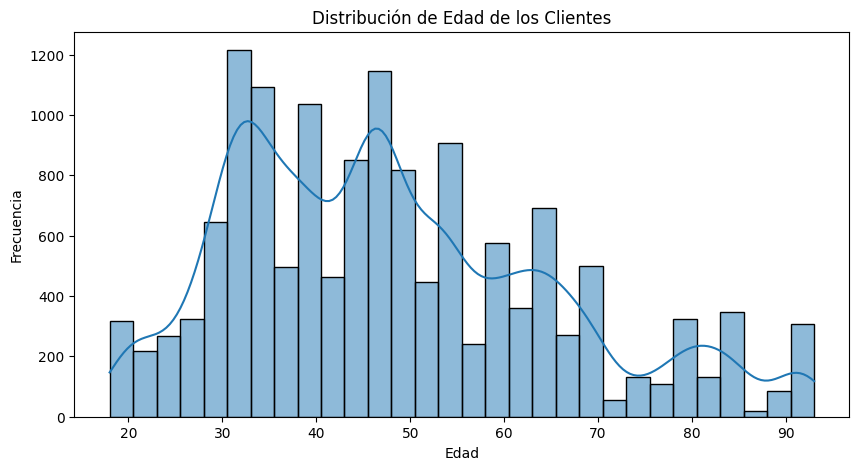

In [117]:
# Histograma de la distribución de edades
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

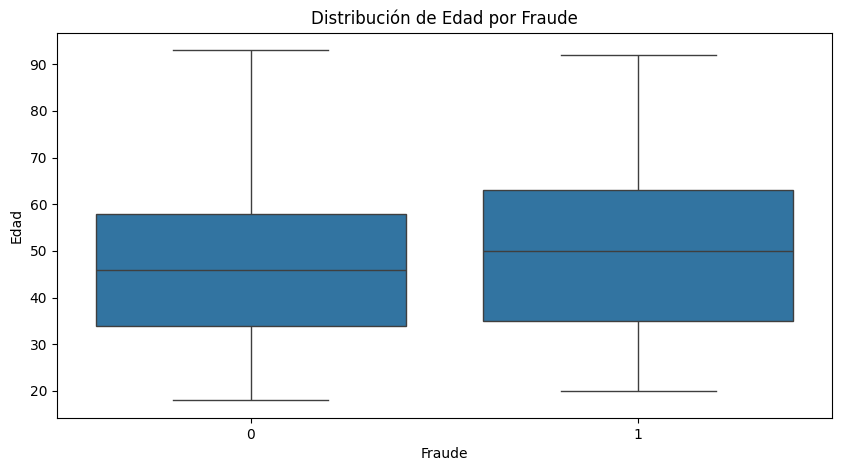

In [118]:
# Boxplot de la edad por fraude
plt.figure(figsize=(10,5))
sns.boxplot(x='is_fraud', y='age', data=df)
plt.title('Distribución de Edad por Fraude')
plt.xlabel('Fraude')
plt.ylabel('Edad')
plt.show()

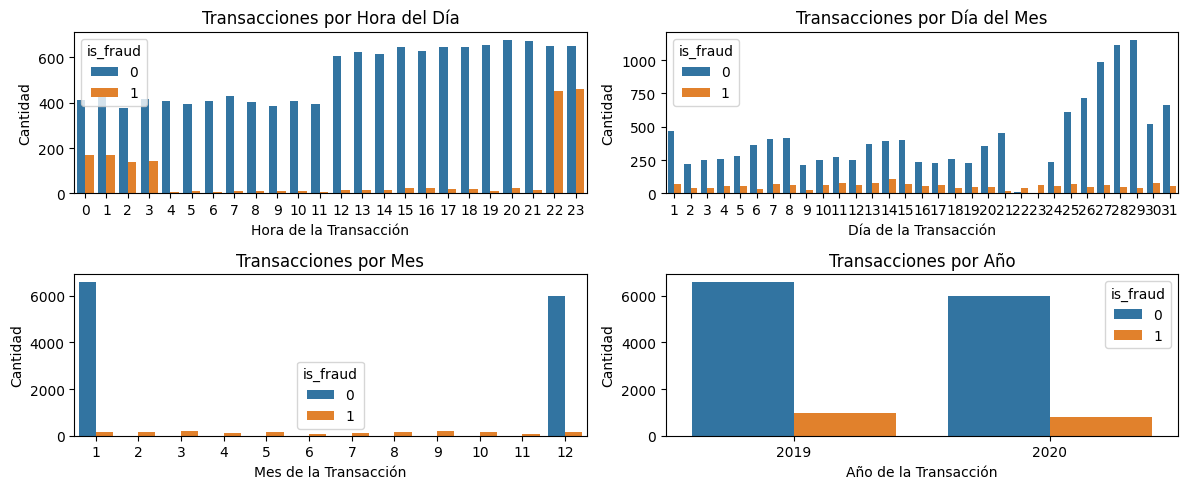

In [119]:
# Crear subplots para cada variable de tiempo
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))

# Gráfico para 'transaction_hour'
sns.countplot(x='transaction_hour', hue='is_fraud', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Transacciones por Hora del Día')
axes[0, 0].set_xlabel('Hora de la Transacción')
axes[0, 0].set_ylabel('Cantidad')

# Gráfico para 'transaction_day'
sns.countplot(x='transaction_day_of_month', hue='is_fraud', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Transacciones por Día del Mes')
axes[0, 1].set_xlabel('Día de la Transacción')
axes[0, 1].set_ylabel('Cantidad')

# Gráfico para 'transaction_month'
sns.countplot(x='transaction_month', hue='is_fraud', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Transacciones por Mes')
axes[1, 0].set_xlabel('Mes de la Transacción')
axes[1, 0].set_ylabel('Cantidad')

# Gráfico para 'transaction_year'
sns.countplot(x='transaction_year', hue='is_fraud', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Transacciones por Año')
axes[1, 1].set_xlabel('Año de la Transacción')
axes[1, 1].set_ylabel('Cantidad')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [126]:
# Define los nombres de los días de la semana
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Agrupa las transacciones por día de la semana y cuenta la cantidad de fraudes
fraud_by_day = df.groupby('transaction_day_of_week')['is_fraud'].sum().reset_index()

# Asigna los nombres de los días a la columna 'transaction_day_of_week'
fraud_by_day['transaction_day_of_week'] = fraud_by_day['transaction_day_of_week'].map(lambda x: days[x])

# Ordena los datos por la cantidad de fraudes de mayor a menor
fraud_by_day = fraud_by_day.sort_values(by='is_fraud', ascending=False)

# Crea el gráfico de barras con Plotly Express
fig = px.bar(fraud_by_day, x='transaction_day_of_week', y='is_fraud',
             labels={'transaction_day_of_week': 'Día de la semana', 'is_fraud': 'Cantidad de Fraudes'},
             title='Cantidad de Fraudes por Día de la Semana')

# Agrega la cantidad encima de cada barra
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

In [127]:
# Cantidad de establecimientos 'merchant' en df
df['merchant'].nunique()

693

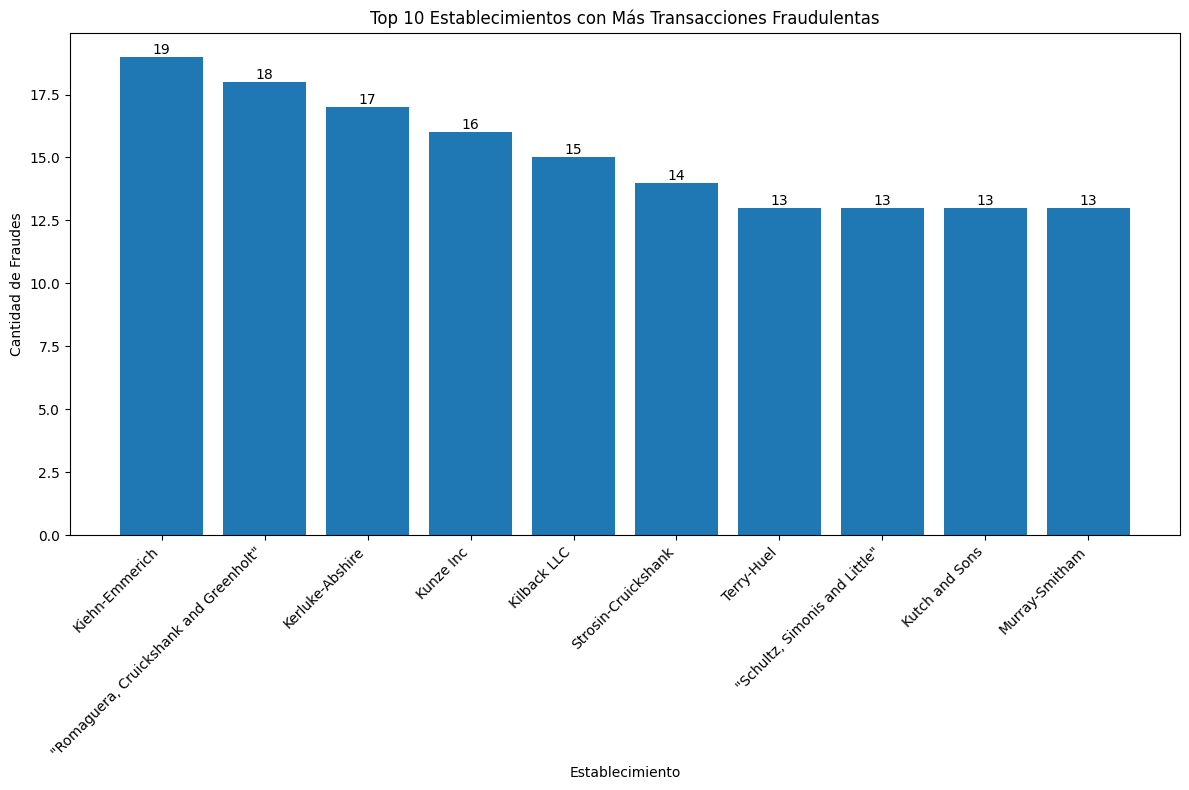

In [129]:
# Agrupa por 'merchant' y cuenta las transacciones fraudulentas
merchant_fraud_counts = df[df['is_fraud'] == 1].groupby('merchant')['is_fraud'].count()

# Ordena los establecimientos por la cantidad de fraudes de mayor a menor y toma los 10 primeros
top_10_merchants = merchant_fraud_counts.sort_values(ascending=False).head(10)

# Crea el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_merchants.index, top_10_merchants.values)
plt.title('Top 10 Establecimientos con Más Transacciones Fraudulentas')
plt.xlabel('Establecimiento')
plt.ylabel('Cantidad de Fraudes')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mejor legibilidad

# Agrega las cantidades encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

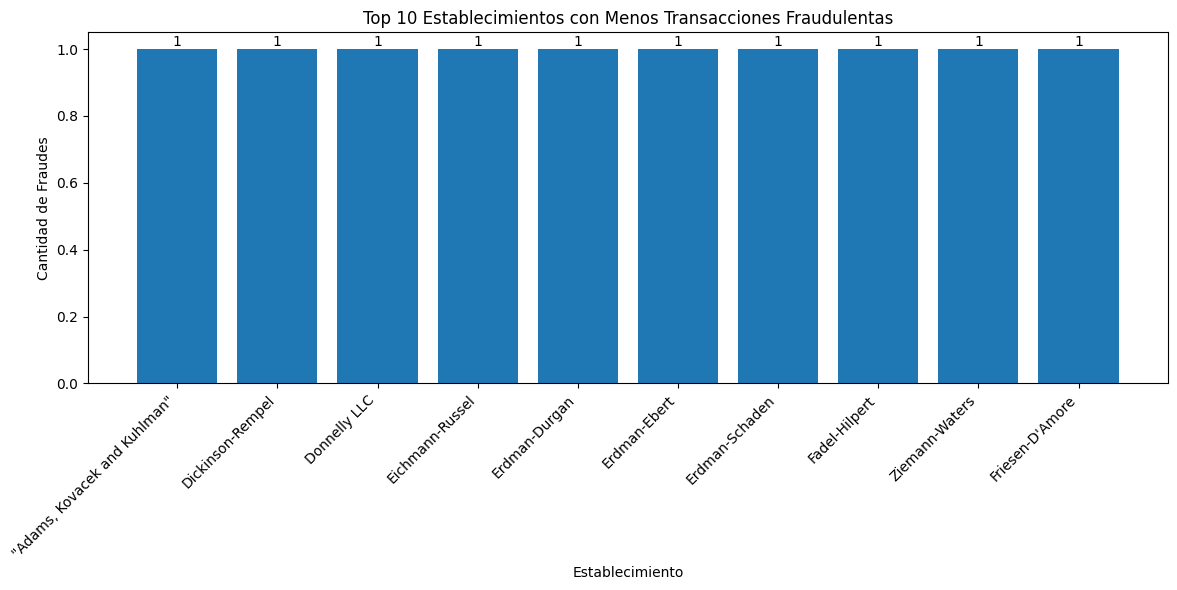

In [131]:
# Agrupa por 'merchant' y cuenta las transacciones fraudulentas
merchant_fraud_counts = df[df['is_fraud'] == 1].groupby('merchant')['is_fraud'].count()

# Ordena los establecimientos por la cantidad de fraudes de menor a mayor y toma los 10 primeros
bottom_10_merchants = merchant_fraud_counts.sort_values(ascending=True).head(10)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(bottom_10_merchants.index, bottom_10_merchants.values)
plt.title('Top 10 Establecimientos con Menos Transacciones Fraudulentas')
plt.xlabel('Establecimiento')
plt.ylabel('Cantidad de Fraudes')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mejor legibilidad

# Agrega las cantidades encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

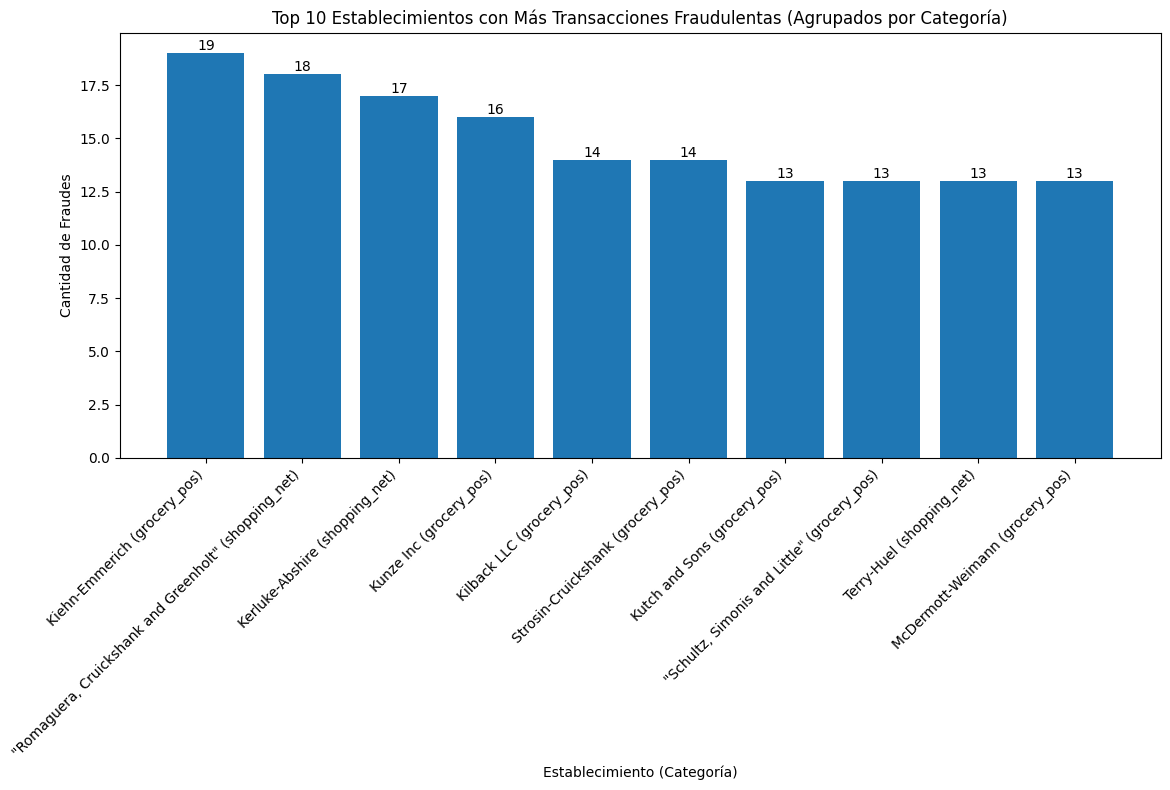

In [133]:
# Agrupa por 'merchant' y 'category', cuenta las transacciones fraudulentas
merchant_category_fraud = df[df['is_fraud'] == 1].groupby(['merchant', 'category'])['is_fraud'].count().reset_index(name='fraud_count')

# Ordena por la cantidad de fraudes de mayor a menor
merchant_category_fraud = merchant_category_fraud.sort_values('fraud_count', ascending=False)

# Toma los 10 primeros
top_10_merchant_category = merchant_category_fraud.head(10)

# Crea el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_merchant_category['merchant'] + ' (' + top_10_merchant_category['category'] + ')', top_10_merchant_category['fraud_count'])
plt.title('Top 10 Establecimientos con Más Transacciones Fraudulentas (Agrupados por Categoría)')
plt.xlabel('Establecimiento (Categoría)')
plt.ylabel('Cantidad de Fraudes')
plt.xticks(rotation=45, ha='right')

# Agrega las cantidades encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Mapa de Densidad por Fraude en Ciudades

maps = df[df['is_fraud'] == 1][['city', 'lat', 'long']].drop_duplicates().sort_values('city').reset_index(drop=True)
counts = df[df['is_fraud'] == 1]['city'].value_counts().rename_axis('city').reset_index(name='count')
maps = maps.merge(counts , on='city' , how='left').sort_values('count')

fig = px.density_mapbox(
    maps, lat='lat', lon='long', z='count',
    color_continuous_scale='Plasma', radius=10,
    title='Mapa de Densidad por Fraude en Ciudades',
    center={"lat": 39.8283, "lon": -93}, zoom=3,
    mapbox_style="open-street-map", hover_name='city',
    height=500, width=1000
)

fig.show()

In [137]:
# Group by city and sum the fraudulent transactions
fraud_counts_by_city = df.groupby('city')['is_fraud'].sum().sort_values(ascending=False)

# Select the top 10 cities with the most fraud
top_10_fraud_cities = fraud_counts_by_city.head(10).reset_index()

# Merge with original dataframe to get coordinates
top_10_cities_df = pd.merge(top_10_fraud_cities, df[['city', 'lat', 'long', 'state']], on='city', how='left').drop_duplicates()

#Filter for US states
us_states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
top_10_cities_df = top_10_cities_df[top_10_cities_df['state'].isin(us_states)]


# Create the map
fig = px.scatter_mapbox(top_10_cities_df, lat="lat", lon="long", hover_name="city",
                        hover_data={"is_fraud": True, "lat":False, "long":False},
                        color="is_fraud", size="is_fraud", zoom=3, height=600, width=800,
                        mapbox_style="carto-positron", title="Top 10 Cities with Most Fraudulent Transactions in the US")

fig.update_layout(mapbox_style="open-street-map")  # Use a different map style if desired
fig.show()

In [142]:
# Agrupa las transacciones por ciudad y calcula la cantidad de transacciones fraudulentas
fraud_counts_by_city = df.groupby('city')['is_fraud'].sum().sort_values(ascending=False)

# Selecciona las 10 ciudades con más fraude
top_10_fraud_cities = fraud_counts_by_city.head(10)

# Imprime el nombre de las ciudades
print(top_10_fraud_cities.index.tolist())

['Albuquerque', 'Aurora', 'Fort Washakie', 'Glendale', 'Mesa', 'Hubbell', 'Seattle', 'San Diego', 'San Jose', 'Phoenix']


# Transformación de Datos

Creando grupos de profesiones

In [159]:
# Cuenta la cantidad de valores unicos de df['job']

print(df['job'].nunique())

163


In [ ]:
# Mostrando los valores únicos de job
df['job'].unique()

array(['"Administrator, education"', 'Cytogeneticist',
       '"Solicitor, Scotland"', 'Science writer', 'Product designer',
       '"Surveyor, minerals"', 'Marketing executive', 'Comptroller',
       'Electronics engineer', 'Clinical cytogeneticist',
       '"Engineer, site"', 'Armed forces training and education officer',
       'Tourist information centre manager',
       '"Administrator, local government"', 'Systems analyst',
       'Charity officer', 'Public relations account executive',
       'Set designer', 'Information systems manager',
       'Occupational hygienist', 'Counsellor', 'Land/geomatics surveyor',
       'Landscape architect', '"Buyer, industrial"',
       'Research scientist (physical sciences)', 'Airline pilot',
       'Careers information officer', '"Pilot, airline"',
       'Industrial/product designer', '"Nurse, mental health"',
       'Health physicist', '"Scientist, audiological"',
       'Health service manager', '"Scientist, physiological"',
       'Cartog

In [158]:
# prompt: elimina df['profession_group'] de df
# del df['profession_group']

In [163]:
def classify_profession(profession):
    # Convertir a minúsculas para facilitar la búsqueda
    profession_lower = profession.lower()

    # Clasificar según palabras clave
    if any(keyword in profession_lower for keyword in ['engineer', 'engineering']):
        return 'Engineering'
    elif any(keyword in profession_lower for keyword in ['scientist', 'research', 'science']):
        return 'Science'
    elif any(keyword in profession_lower for keyword in ['teacher', 'lecturer', 'education', 'instructor', 'mentor']):
        return 'Education'
    elif any(keyword in profession_lower for keyword in ['nurse', 'doctor', 'physician', 'pharmacist', 'therapist', 'psychologist', 'health', 'medical']):
        return 'Healthcare'
    elif any(keyword in profession_lower for keyword in ['architect', 'building', 'planner', 'surveyor']):
        return 'Architecture & Construction'
    elif any(keyword in profession_lower for keyword in ['artist', 'musician', 'writer', 'designer', 'arts', 'editor', 'journalist']):
        return 'Arts & Media'
    elif any(keyword in profession_lower for keyword in ['finance', 'accountant', 'investment', 'banker', 'economist', 'trader']):
        return 'Finance & Business'
    elif any(keyword in profession_lower for keyword in ['marketing', 'sales', 'public relations', 'advertising', 'executive']):
        return 'Marketing & Sales'
    elif any(keyword in profession_lower for keyword in ['it', 'developer', 'systems', 'network', 'data', 'intelligence']):
        return 'Information Technology'
    elif any(keyword in profession_lower for keyword in ['law', 'barrister', 'solicitor', 'legal']):
        return 'Law'
    elif any(keyword in profession_lower for keyword in ['government', 'civil service', 'local government']):
        return 'Public Administration'
    elif any(keyword in profession_lower for keyword in ['firefighter', 'armed forces', 'police', 'naval']):
        return 'Public Safety & Defense'
    else:
        return 'Other'

# Aplicando la función a la cplumna 'job'
df['profession_group'] = df['job'].apply(classify_profession)

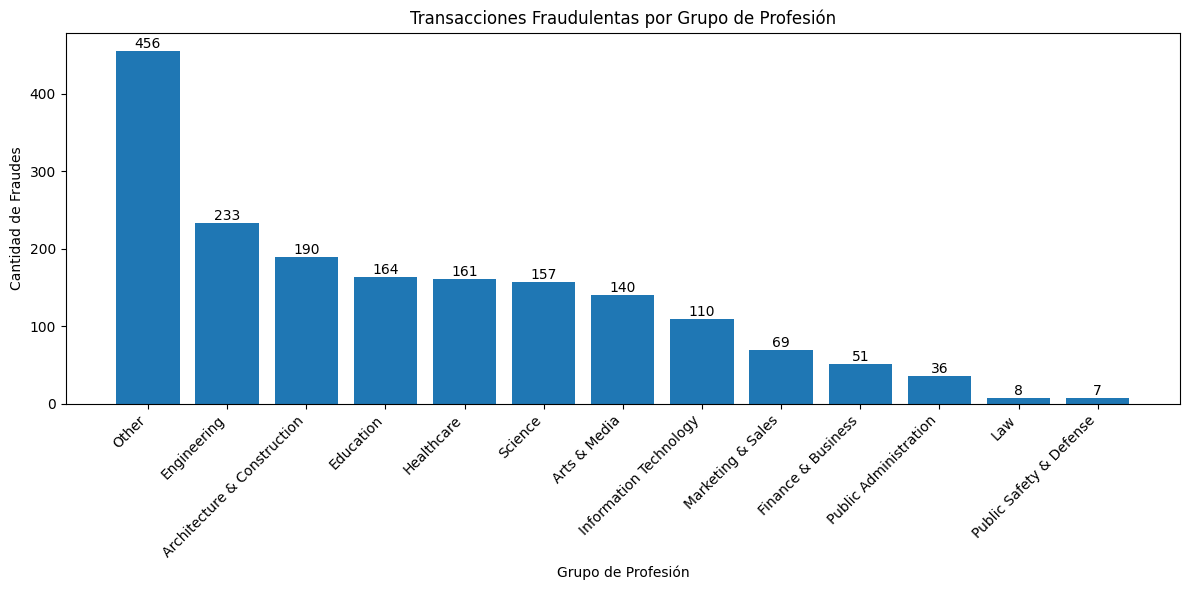

In [164]:
# Agrupa por grupo de profesión y cuenta las transacciones fraudulentas
fraud_counts_by_profession = df[df['is_fraud'] == 1].groupby('profession_group')['is_fraud'].count()

# Ordena los grupos de profesión por la cantidad de fraudes de mayor a menor
fraud_counts_by_profession = fraud_counts_by_profession.sort_values(ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(fraud_counts_by_profession.index, fraud_counts_by_profession.values)
plt.title('Transacciones Fraudulentas por Grupo de Profesión')
plt.xlabel('Grupo de Profesión')
plt.ylabel('Cantidad de Fraudes')
plt.xticks(rotation=45, ha='right')

# Agrega las cantidades encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [208]:
# Definimos grupos de profesiones
def classify_profession(profession):
    profession_lower = profession.lower()
    if any(keyword in profession_lower for keyword in ['engineer', 'scientist', 'technologist', 'technologist']):
        return 'Ingeniería y Técnicos'
    elif any(keyword in profession_lower for keyword in ['nurse', 'therapist', 'psychologist','doctor', 'physician', 'dentist', 'surgeon']):
        return 'Salud'
    elif any(keyword in profession_lower for keyword in ['teacher', 'lecturer', 'educator']):
        return 'Educación'
    elif any(keyword in profession_lower for keyword in ['manager', 'executive', 'officer', 'consultant']):
        return 'Ejecutivos'
    elif any(keyword in profession_lower for keyword in ['artist', 'designer', 'writer', 'musician']):
        return 'Arte'
    elif any(keyword in profession_lower for keyword in ['administrator', 'accountant', 'officer']):
        return 'Administradores'
    else:
        return 'Other'

# Aplicando la función a la cplumna 'job'
df['profession_group'] = df['job'].apply(classify_profession)

In [209]:
# Cuenta los registros por profesión
df['profession_group'].value_counts()

,count
profession_group,
Other,6064
Ingeniería y Técnicos,2989
Ejecutivos,2498
Salud,1314
Educación,596
Arte,589
Administradores,333


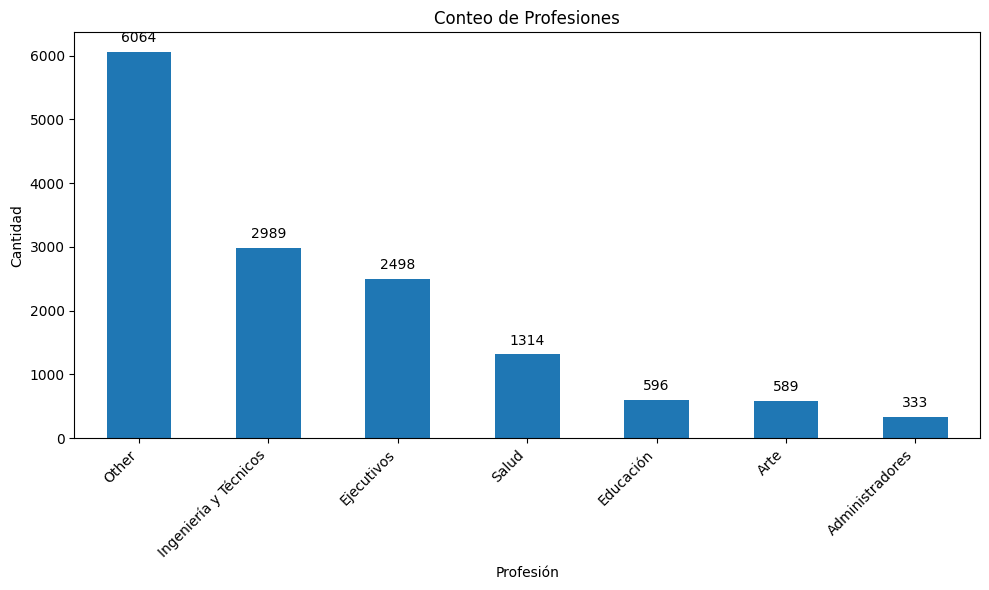

In [172]:
# Grafica profesiones
plt.figure(figsize=(10, 6))
ax = df['profession_group'].value_counts().plot(kind='bar')
plt.title('Conteo de Profesiones')
plt.xlabel('Profesión')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

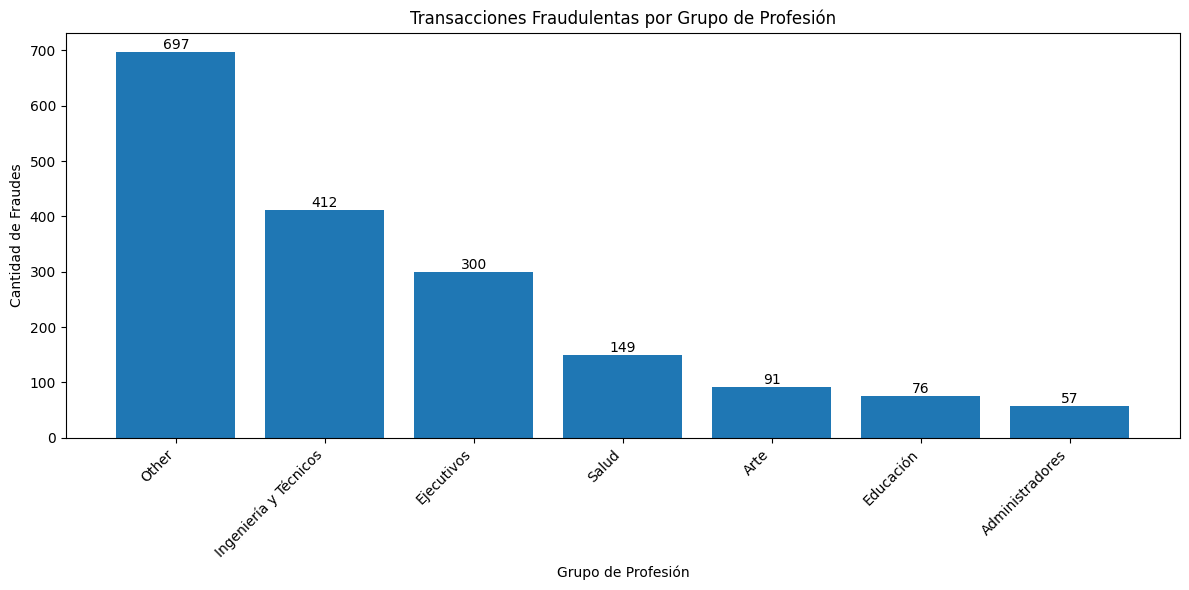

In [173]:
# Agrupa por grupo de profesión y cuenta las transacciones fraudulentas
fraud_counts_by_profession = df[df['is_fraud'] == 1].groupby('profession_group')['is_fraud'].count()

# Ordena los grupos de profesión por la cantidad de fraudes de mayor a menor
fraud_counts_by_profession = fraud_counts_by_profession.sort_values(ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(fraud_counts_by_profession.index, fraud_counts_by_profession.values)
plt.title('Transacciones Fraudulentas por Grupo de Profesión')
plt.xlabel('Grupo de Profesión')
plt.ylabel('Cantidad de Fraudes')
plt.xticks(rotation=45, ha='right')

# Agrega las cantidades encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [210]:
# columnas de df
print(df.columns)

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_time', 'age',
       'transaction_hour', 'transaction_day_of_month', 'transaction_month',
       'transaction_year', 'transaction_day_of_week', 'profession_group'],
      dtype='object')


In [211]:
# Columnas categóricas de df
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['merchant', 'category', 'city', 'state', 'job', 'trans_num',
       'trans_date', 'trans_time', 'profession_group'],
      dtype='object')


In [212]:
# Columnas numéricas de df
numerical_cols = df.select_dtypes(include=np.number).columns
print(numerical_cols)

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'transaction_hour', 'transaction_day_of_month',
       'transaction_month', 'transaction_year', 'transaction_day_of_week'],
      dtype='object')


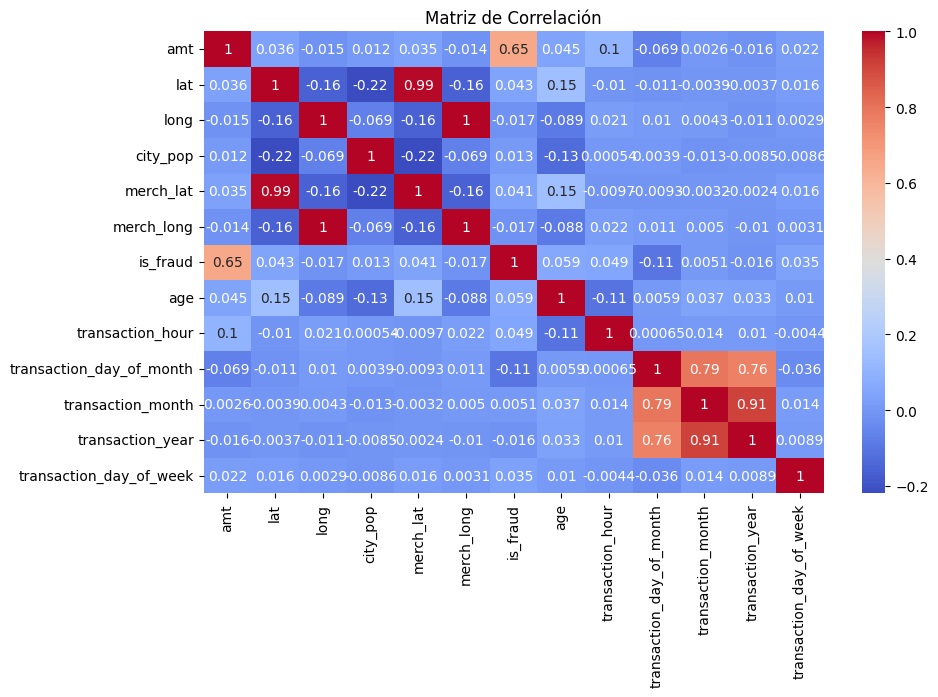

In [178]:
# Mapa de Calor - Pearson
plt.figure(figsize=(10,6))
sns.heatmap(df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'transaction_hour', 'transaction_day_of_month', 'transaction_month',
       'transaction_year', 'transaction_day_of_week']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

lat, merch_lat : altamente correlacionadas

long, merch_long : altamente correlacionadas

In [182]:
# Estadística df
df.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
amt,14383.0,122.719068,228.879064,1.000000,11.945000,51.290000,100.140000,3.261470e+03
lat,14383.0,39.761571,5.266532,20.027100,36.715400,39.666200,41.940400,6.669330e+01
long,14383.0,-110.835395,12.877931,-165.672300,-120.282400,-111.098500,-101.136000,-8.962870e+01
city_pop,14383.0,106392.139331,290043.858658,46.000000,493.000000,1645.000000,35439.000000,2.383912e+06
merch_lat,14383.0,39.761755,5.309190,19.032689,36.768908,39.613766,42.275391,6.751027e+01
merch_long,14383.0,-110.836186,12.887765,-166.670685,-120.095775,-111.203646,-100.556920,-8.864637e+01
is_fraud,14383.0,0.123896,0.329475,0.000000,0.000000,0.000000,0.000000,1.000000e+00
age,14383.0,48.066954,17.171371,18.000000,34.000000,46.000000,59.000000,9.300000e+01
transaction_hour,14383.0,13.026351,7.278883,0.000000,7.000000,14.000000,20.000000,2.300000e+01
transaction_day_of_month,14383.0,18.656261,9.561527,1.000000,10.000000,20.000000,28.000000,3.100000e+01


Creando la variable 'fraud_category_merchant'

In [213]:
# Respaldo de df
df_backup = df.copy()

In [192]:
# df = df_backup.copy()

In [214]:
# columnas de df
print(df.columns)

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_time', 'age',
       'transaction_hour', 'transaction_day_of_month', 'transaction_month',
       'transaction_year', 'transaction_day_of_week', 'profession_group'],
      dtype='object')


In [215]:
df.head().T

,0,1,2,3,4
trans_date_trans_time,2019-01-04 00:58:00,2019-01-04 15:06:00,2019-01-04 22:37:00,2019-01-04 23:06:00,2019-01-04 23:59:00
merchant,"""Stokes, Christiansen and Sipes""",Predovic Inc,Wisozk and Sons,Murray-Smitham,Friesen Lt
category,grocery_net,shopping_net,misc_pos,grocery_pos,health_fitness
amt,14.37,966.11,49.61,295.26,18.17
city,Wales,Wales,Wales,Wales,Wales
state,Alaska,Alaska,Alaska,Alaska,Alaska
lat,64.7556,64.7556,64.7556,64.7556,64.7556
long,-165.6723,-165.6723,-165.6723,-165.6723,-165.6723
city_pop,145,145,145,145,145
job,"""Administrator, education""","""Administrator, education""","""Administrator, education""","""Administrator, education""","""Administrator, education"""


In [ ]:
# Elimina columnas porque es del dueño de la tarjeta
"""df = df.drop(columns=['trans_date_trans_time', 'state','city', 'lat', 'long', 'job', 'trans_num', 'merch_lat',
       """'merch_long', 'trans_date', 'trans_time','transaction_day_of_week','transaction_year'])

In [216]:
# Elimina columnas porque es del dueño de la tarjeta
df = df.drop(columns=['trans_date_trans_time','job','trans_num', 'trans_date','trans_time' ])

In [217]:
df.head().T

,0,1,2,3,4
merchant,"""Stokes, Christiansen and Sipes""",Predovic Inc,Wisozk and Sons,Murray-Smitham,Friesen Lt
category,grocery_net,shopping_net,misc_pos,grocery_pos,health_fitness
amt,14.37,966.11,49.61,295.26,18.17
city,Wales,Wales,Wales,Wales,Wales
state,Alaska,Alaska,Alaska,Alaska,Alaska
lat,64.7556,64.7556,64.7556,64.7556,64.7556
long,-165.6723,-165.6723,-165.6723,-165.6723,-165.6723
city_pop,145,145,145,145,145
merch_lat,65.654142,65.468863,65.347667,64.445035,65.447094
merch_long,-164.722603,-165.473127,-165.914542,-166.080207,-165.446843


In [218]:
# columnas de df
print(df.columns)

Index(['merchant', 'category', 'amt', 'city', 'state', 'lat', 'long',
       'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'transaction_hour', 'transaction_day_of_month', 'transaction_month',
       'transaction_year', 'transaction_day_of_week', 'profession_group'],
      dtype='object')


In [219]:
# valores unicos de columna 'merchant'
unique_merchants = df['merchant'].unique()
print(unique_merchants)

['"Stokes, Christiansen and Sipes"' 'Predovic Inc' 'Wisozk and Sons'
 'Murray-Smitham' 'Friesen Lt' '"Raynor, Reinger and Hagenes"'
 'Heller-Langosh' 'Padberg-Welch' 'McGlynn-Heathcote' 'Dooley-Thompson'
 '"Gottlieb, Considine and Schultz"' '"Moen, Reinger and Murphy"'
 '"Hauck, Dietrich and Funk"' 'Pouros-Haag' 'Goyette Inc'
 '"Baumbach, Strosin and Nicolas"' "Pacocha-O'Reilly" 'Barrows PLC'
 'Fisher-Schowalte' 'Gleason-Macejkovic' 'Kutch LLC' 'Kihn Inc'
 'Kris-Weimann' '"Kihn, Abernathy and Douglas"' 'Kiehn-Emmerich'
 '"Osinski, Ledner and Leuschke"' 'Vandervort-Funk' 'Terry-Huel'
 'Volkman-Predovic' '"Roob, Conn and Tremblay"'
 '"Tillman, Fritsch and Schmitt"' 'Larson-Moen' 'Kutch and Sons'
 '"Parisian, Schiller and Altenwerth"' 'Kozey-Boehm' 'Rau and Sons'
 'Parisian and Sons' "O'Keefe-Hudson" 'Cassin-Harvey'
 '"Schumm, Bauch and Ondrick"' '"Towne, Walker and Bore"' 'Kling-Grant'
 '"Jenkins, Hauck and Friesen"' '"Baumbach, Hodkiewicz and Walsh"'
 'Beier-Hyatt' '"Reichert, Huels and

In [220]:
# cuenta valores unicos de 'merchant'
unique_merchant_count = df['merchant'].nunique()
print(f"Número de valores únicos en la columna 'merchant': {unique_merchant_count}")

Número de valores únicos en la columna 'merchant': 693


In [221]:
# cuenta valores unicos de 'merchant'  tomando en cuenta 'is_fraud'==1
fraud_merchant_counts = df[df['is_fraud'] == 1]['merchant'].nunique()
print(f"Número de comerciantes únicos con transacciones fraudulentas: {fraud_merchant_counts}")

Número de comerciantes únicos con transacciones fraudulentas: 509


In [224]:
# Filtrando transaciones fraudulentas, por 'merchant'
frauds_by_merchant = df[df['is_fraud'] == 1].groupby('merchant').size().reset_index(name='fraud_count')
# Agrupando los datos
merged_df = df.groupby('merchant').size().reset_index(name='total_transactions').merge(frauds_by_merchant, on='merchant', how='left')
# Mostrando merged DataFrame
merged_df.sort_values(by='fraud_count', ascending=False, inplace=True)
merged_df.head(10)

,merchant,total_transactions,fraud_count
445,Kiehn-Emmerich,41,19.0
155,"""Romaguera, Cruickshank and Greenholt""",37,18.0
440,Kerluke-Abshire,34,17.0
477,Kunze Inc,31,16.0
450,Kilback LLC,58,15.0
639,Strosin-Cruickshank,34,14.0
642,Terry-Huel,29,13.0
173,"""Schultz, Simonis and Little""",35,13.0
483,Kutch and Sons,45,13.0
537,Murray-Smitham,38,13.0


In [225]:
df_resp = df.copy()

In [ ]:
# df = df_resp.copy()

In [226]:
# Función para estandarizar el texto
def standardize_text(text):
    # Eliminar espacios en blanco a los extremos
    text = text.strip()
    # Eliminar dobles comillas al principio y al final
    if text.startswith('"'):
        text = text[1:]
    if text.endswith('"'):
        text = text[:-1]
    return text.strip()  # Retornar el texto estandarizado

In [227]:
# Aplicar la función a la columna merchant
df['merchant'] = df['merchant'].apply(standardize_text)

In [228]:
df['merchant']

,merchant
0,"Stokes, Christiansen and Sipes"
1,Predovic Inc
2,Wisozk and Sons
3,Murray-Smitham
4,Friesen Lt
...,...
14441,Hudson-Grady
14442,"Nienow, Ankunding and Collie"
14443,Pacocha-O'Reilly
14444,"Bins, Balistreri and Beatty"


In [229]:
# Calcular el total de fraudes y el total de transacciones por local
fraud_counts = df.groupby('merchant').agg(
    total_frauds=('is_fraud', 'sum'),
    total_transactions=('is_fraud', 'count')
).reset_index()

# Calcular el porcentaje de fraude
fraud_counts['porcent_fraud'] = (fraud_counts['total_frauds'] / fraud_counts['total_transactions']) * 100


In [230]:
fraud_counts = fraud_counts.sort_values(by='total_frauds', ascending=False)

# Mostrar el resultado
fraud_counts

,merchant,total_frauds,total_transactions,porcent_fraud
309,Kiehn-Emmerich,19,41,46.341463
528,"Romaguera, Cruickshank and Greenholt",18,37,48.648649
304,Kerluke-Abshire,17,34,50.000000
352,Kunze Inc,16,31,51.612903
316,Kilback LLC,15,58,25.862069
...,...,...,...,...
133,Dibbert and Sons,0,28,0.000000
132,"Denesik, Powlowski and Pouros",0,25,0.000000
500,Reichel LLC,0,17,0.000000
501,"Reichel, Bradtke and Blan",0,8,0.000000


In [231]:
# Contar los fraudes por establecimiento
fraud_counts.rename(columns={'total_frauds': 'fraud_count'}, inplace=True)
fraud_counts

,merchant,fraud_count,total_transactions,porcent_fraud
309,Kiehn-Emmerich,19,41,46.341463
528,"Romaguera, Cruickshank and Greenholt",18,37,48.648649
304,Kerluke-Abshire,17,34,50.000000
352,Kunze Inc,16,31,51.612903
316,Kilback LLC,15,58,25.862069
...,...,...,...,...
133,Dibbert and Sons,0,28,0.000000
132,"Denesik, Powlowski and Pouros",0,25,0.000000
500,Reichel LLC,0,17,0.000000
501,"Reichel, Bradtke and Blan",0,8,0.000000


In [232]:
# Total de transacciones con fraude
total_frauds = df['is_fraud'].sum()
total_frauds

1782

In [233]:
# Unir los conteos con el DataFrame original
df = df.merge(fraud_counts, on='merchant', how='left')

In [234]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,14383.0,122.719068,228.879064,1.000000,11.945000,51.290000,100.140000,3.261470e+03
lat,14383.0,39.761571,5.266532,20.027100,36.715400,39.666200,41.940400,6.669330e+01
long,14383.0,-110.835395,12.877931,-165.672300,-120.282400,-111.098500,-101.136000,-8.962870e+01
city_pop,14383.0,106392.139331,290043.858658,46.000000,493.000000,1645.000000,35439.000000,2.383912e+06
merch_lat,14383.0,39.761755,5.309190,19.032689,36.768908,39.613766,42.275391,6.751027e+01
merch_long,14383.0,-110.836186,12.887765,-166.670685,-120.095775,-111.203646,-100.556920,-8.864637e+01
is_fraud,14383.0,0.123896,0.329475,0.000000,0.000000,0.000000,0.000000,1.000000e+00
age,14383.0,48.066954,17.171371,18.000000,34.000000,46.000000,59.000000,9.300000e+01
transaction_hour,14383.0,13.026351,7.278883,0.000000,7.000000,14.000000,20.000000,2.300000e+01
transaction_day_of_month,14383.0,18.656261,9.561527,1.000000,10.000000,20.000000,28.000000,3.100000e+01


In [235]:
df.head(5).T

,0,1,2,3,4
merchant,"Stokes, Christiansen and Sipes",Predovic Inc,Wisozk and Sons,Murray-Smitham,Friesen Lt
category,grocery_net,shopping_net,misc_pos,grocery_pos,health_fitness
amt,14.37,966.11,49.61,295.26,18.17
city,Wales,Wales,Wales,Wales,Wales
state,Alaska,Alaska,Alaska,Alaska,Alaska
lat,64.7556,64.7556,64.7556,64.7556,64.7556
long,-165.6723,-165.6723,-165.6723,-165.6723,-165.6723
city_pop,145,145,145,145,145
merch_lat,65.654142,65.468863,65.347667,64.445035,65.447094
merch_long,-164.722603,-165.473127,-165.914542,-166.080207,-165.446843


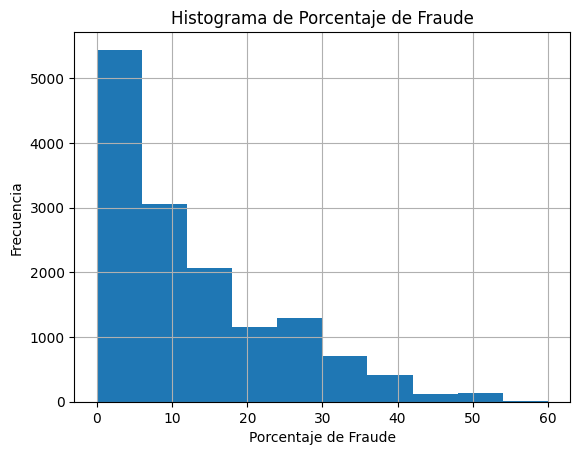

In [245]:
# Histograma de 'porcent_fraud'
df['porcent_fraud'].hist()
plt.title('Histograma de Porcentaje de Fraude')
plt.xlabel('Porcentaje de Fraude')
plt.ylabel('Frecuencia')
plt.show()


In [246]:
# Calcular los percentiles para dividir en 5 clases
percentiles = df['porcent_fraud'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values
percentiles

array([ 0.        ,  0.        ,  6.66666667, 12.12121212, 22.22222222,
       60.        ])

In [238]:
# Crear la nueva columna fraud_category_merchant
def categorize_fraud(row):
    if row['porcent_fraud'] == 0:
        return 0
    elif row['porcent_fraud'] <= percentiles[1]:  # Entre 0 y el 20vo percentil
        return 1
    elif row['porcent_fraud'] <= percentiles[2]:  # Entre el 20vo y el 40vo percentil
        return 2
    elif row['porcent_fraud'] <= percentiles[3]:  # Entre el 40vo y el 60vo percentil
        return 3
    elif row['porcent_fraud'] <= percentiles[4]:  # Entre el 60vo y el 80vo percentil
        return 4
    else:  # Por encima del 80vo percentil
        return 5

In [247]:
percentiles[0]

0.0

In [248]:
percentiles[1]

0.0

In [249]:
percentiles[2]

6.666666666666667

In [250]:
percentiles[3]

12.121212121212121

In [251]:
percentiles[4]

22.22222222222222

In [252]:
# Aplicar la función para crear la nueva columna
df['fraud_category_merchant'] = df.apply(categorize_fraud, axis=1)

In [253]:
# Mostrar el resultado final
df.head().T

,0,1,2,3,4
merchant,"Stokes, Christiansen and Sipes",Predovic Inc,Wisozk and Sons,Murray-Smitham,Friesen Lt
category,grocery_net,shopping_net,misc_pos,grocery_pos,health_fitness
amt,14.37,966.11,49.61,295.26,18.17
city,Wales,Wales,Wales,Wales,Wales
state,Alaska,Alaska,Alaska,Alaska,Alaska
lat,64.7556,64.7556,64.7556,64.7556,64.7556
long,-165.6723,-165.6723,-165.6723,-165.6723,-165.6723
city_pop,145,145,145,145,145
merch_lat,65.654142,65.468863,65.347667,64.445035,65.447094
merch_long,-164.722603,-165.473127,-165.914542,-166.080207,-165.446843


In [254]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,14383.0,122.719068,228.879064,1.000000,11.945000,51.290000,100.140000,3.261470e+03
lat,14383.0,39.761571,5.266532,20.027100,36.715400,39.666200,41.940400,6.669330e+01
long,14383.0,-110.835395,12.877931,-165.672300,-120.282400,-111.098500,-101.136000,-8.962870e+01
city_pop,14383.0,106392.139331,290043.858658,46.000000,493.000000,1645.000000,35439.000000,2.383912e+06
merch_lat,14383.0,39.761755,5.309190,19.032689,36.768908,39.613766,42.275391,6.751027e+01
merch_long,14383.0,-110.836186,12.887765,-166.670685,-120.095775,-111.203646,-100.556920,-8.864637e+01
is_fraud,14383.0,0.123896,0.329475,0.000000,0.000000,0.000000,0.000000,1.000000e+00
age,14383.0,48.066954,17.171371,18.000000,34.000000,46.000000,59.000000,9.300000e+01
transaction_hour,14383.0,13.026351,7.278883,0.000000,7.000000,14.000000,20.000000,2.300000e+01
transaction_day_of_month,14383.0,18.656261,9.561527,1.000000,10.000000,20.000000,28.000000,3.100000e+01


In [255]:
df[df['merchant'] == "Kiehn-Emmerich"]

,merchant,category,amt,city,state,lat,long,city_pop,merch_lat,merch_long,...,transaction_hour,transaction_day_of_month,transaction_month,transaction_year,transaction_day_of_week,profession_group,fraud_count,total_transactions,porcent_fraud,fraud_category_merchant
24,Kiehn-Emmerich,grocery_pos,320.60,Ravenna,Nebraska,41.0233,-98.9041,2202,41.867565,-99.096279,...,0,13,1,2019,6,Other,19,41,46.341463,5
117,Kiehn-Emmerich,grocery_pos,257.47,La Grande,Oregon,45.3304,-118.0852,16955,44.575710,-117.809870,...,7,8,2,2019,4,Ingeniería y Técnicos,19,41,46.341463,5
173,Kiehn-Emmerich,grocery_pos,285.81,Hubbell,Nebraska,40.0456,-97.4735,121,40.990782,-97.605382,...,3,25,2,2019,0,Arte,19,41,46.341463,5
223,Kiehn-Emmerich,grocery_pos,305.28,Mesa,Arizona,33.4317,-111.8469,478404,32.540641,-112.713779,...,14,14,3,2019,3,Other,19,41,46.341463,5
260,Kiehn-Emmerich,grocery_pos,348.72,Napa,California,38.4549,-122.2564,94014,38.029749,-122.067051,...,9,17,3,2019,6,Other,19,41,46.341463,5
263,Kiehn-Emmerich,grocery_pos,282.17,Kaktovik,Alaska,66.6933,-153.9940,239,67.397018,-154.118108,...,1,22,3,2019,4,Ejecutivos,19,41,46.341463,5
288,Kiehn-Emmerich,grocery_pos,315.55,Aurora,Colorado,39.7656,-104.7069,389246,39.355490,-104.188137,...,3,25,3,2019,0,Arte,19,41,46.341463,5
364,Kiehn-Emmerich,grocery_pos,313.33,Blairsden-Graeagle,California,39.8127,-120.6405,1725,39.384000,-119.960675,...,2,30,4,2019,1,Ejecutivos,19,41,46.341463,5
408,Kiehn-Emmerich,grocery_pos,343.27,Campbell,Nebraska,40.2967,-98.7370,493,40.863615,-99.383553,...,22,17,5,2019,4,Other,19,41,46.341463,5
468,Kiehn-Emmerich,grocery_pos,298.99,San Jose,California,37.3304,-121.7913,973849,36.968997,-121.720965,...,3,14,6,2019,4,Ingeniería y Técnicos,19,41,46.341463,5


In [256]:
# Verificar si la columna 'fraud_category_merchant' tiene valores nulos
null_count = df['fraud_category_merchant'].isnull().sum()

if null_count > 0:
  print(f"La columna 'fraud_category_merchant' tiene {null_count} valores nulos.")
else:
  print("La columna 'fraud_category_merchant' no tiene valores nulos.")


La columna 'fraud_category_merchant' no tiene valores nulos.


In [258]:
# columnas de df
print(df.columns)

Index(['merchant', 'category', 'amt', 'city', 'state', 'lat', 'long',
       'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'transaction_hour', 'transaction_day_of_month', 'transaction_month',
       'transaction_year', 'transaction_day_of_week', 'profession_group',
       'fraud_count', 'total_transactions', 'porcent_fraud',
       'fraud_category_merchant'],
      dtype='object')


In [259]:
# Eliminando columnas no necesarias
df = df.drop(columns=['merchant','fraud_count','total_transactions','porcent_fraud'])

In [265]:
# columnas de df
print(df.columns)

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant'],
      dtype='object')


In [266]:
# Información nueva de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14383 entries, 0 to 14382
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  14383 non-null  object 
 1   amt                       14383 non-null  float64
 2   city                      14383 non-null  object 
 3   state                     14383 non-null  object 
 4   lat                       14383 non-null  float64
 5   long                      14383 non-null  float64
 6   city_pop                  14383 non-null  int64  
 7   merch_lat                 14383 non-null  float64
 8   merch_long                14383 non-null  float64
 9   is_fraud                  14383 non-null  int64  
 10  age                       14383 non-null  int64  
 11  transaction_hour          14383 non-null  int32  
 12  transaction_day_of_month  14383 non-null  int32  
 13  transaction_month         14383 non-null  int32  
 14  transa

In [267]:
df_backup2 = df.copy()

In [ ]:
 # df = df_backup2.copy()

# Dividiendo los datos (train y test) y Manejo de balanceo del train

In [268]:
# Separa características (X) y variable objetivo (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

In [269]:
# X_train, y_train pasados temporalmente a df_train
df_train= pd.DataFrame(X_train)
df_train['is_fraud'] = y_train
df_train.T

,11966,1572,6649,12255,4089,3505,11096,14295,10249,5119,...,4474,237,5173,9336,4407,6260,13140,12577,4493,7334
category,home,shopping_net,misc_net,entertainment,shopping_pos,grocery_net,shopping_net,kids_pets,home,health_fitness,...,gas_transport,grocery_pos,personal_care,gas_transport,grocery_pos,home,gas_transport,health_fitness,gas_transport,gas_transport
amt,15.0,963.73,109.96,10.43,5.71,39.7,1.43,15.83,20.66,23.11,...,64.71,310.03,205.2,43.37,29.98,2.71,69.45,146.9,73.52,74.17
city,Moriarty,Palmdale,Burbank,Eugene,Redford,Arnold,Norwalk,Fields Landing,Parks,Sun City,...,Hatch,Lonetree,High Rolls Mountain Park,Cascade Locks,Moriarty,Grenada,Fullerton,Holstein,Blairsden-Graeagle,Westfir
state,New Mexico,California,Washington,Oregon,Missouri,Missouri,California,California,Arizona,California,...,Utah,Wyoming,New Mexico,Oregon,New Mexico,California,Nebraska,Nebraska,California,Oregon
lat,34.9889,34.5715,46.1966,44.0385,37.3272,38.4305,33.9056,40.7268,35.2563,33.7467,...,37.7175,41.0552,32.9396,45.671,34.9889,41.6125,41.366,40.4542,39.8127,43.7575
long,-106.0609,-118.0231,-118.9017,-123.0614,-91.0243,-90.387,-118.0818,-124.2174,-111.95,-117.1721,...,-112.4777,-110.1603,-105.8189,-121.8686,-106.0609,-122.5258,-98.0054,-98.6538,-120.6405,-122.481
city_pop,7268,171170,3684,191096,241,35439,105549,276,759,54287,...,258,49,899,1288,7268,589,1749,331,1725,597
merch_lat,35.191886,35.525013,45.563869,44.708545,36.85701,38.952935,34.351833,40.207219,36.19785,34.645096,...,38.378825,41.283249,33.706112,46.431635,34.365198,41.614679,41.820034,40.1038,38.997843,42.872349
merch_long,-105.832554,-117.359532,-118.076592,-122.072096,-91.002408,-90.990324,-117.744959,-124.512417,-112.374533,-117.275318,...,-113.33076,-110.290484,-106.560546,-121.839005,-106.585231,-122.834247,-98.629736,-98.835218,-120.525765,-122.733809
age,31,57,39,55,46,35,46,90,62,48,...,59,38,53,83,32,75,46,69,53,59


In [270]:
# descarga el df_train en un fichero .csv llamado train
df_train.to_csv('train.csv', index=False)
files.download('train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [271]:
# X_test, y_test pasados temporalmente a df_test
df_test= pd.DataFrame(X_test)
df_test['is_fraud'] = y_test
df_test.T

,6322,7863,5594,13858,7967,9051,6277,3997,8633,1501,...,1638,1542,12822,405,5492,7169,10468,9449,2785,7118
category,home,grocery_net,shopping_net,travel,misc_pos,gas_transport,misc_pos,kids_pets,shopping_net,shopping_pos,...,grocery_pos,entertainment,shopping_pos,shopping_pos,grocery_net,misc_pos,grocery_pos,personal_care,grocery_pos,misc_pos
amt,30.02,48.31,80.94,5.28,68.7,49.56,4.82,39.25,14.61,939.78,...,306.95,429.9,43.02,874.29,57.32,34.16,83.92,166.38,119.17,7.22
city,Arnold,Dumont,Blairsden-Graeagle,Cascade Locks,Sun City,Westfir,Pueblo,Mendon,Rocky Mount,Manville,...,Phoenix,Meridian,Ballwin,Campbell,Utica,Fort Washakie,Hooper,Phoenix,Fiddletown,Kirk
state,Missouri,Colorado,California,Oregon,California,Oregon,Colorado,Utah,Missouri,Wyoming,...,Arizona,Idaho,Missouri,Nebraska,Missouri,Wyoming,Nebraska,Arizona,California,Colorado
lat,38.4305,39.7532,39.8127,45.671,33.7467,43.7575,38.2352,41.71,38.2911,42.73,...,33.8155,43.6498,38.577,40.2967,39.7417,43.0048,41.6414,33.5623,38.5234,39.6171
long,-90.387,-105.6356,-120.6405,-121.8686,-117.1721,-122.481,-104.66,-111.9817,-92.7059,-104.7024,...,-112.1202,-116.4306,-90.5255,-98.737,-93.6289,-108.8964,-96.5232,-112.0559,-120.6763,-102.4776
city_pop,35439,565,1725,1288,54287,597,151815,2078,1847,241,...,1312922,84106,92608,493,271,1645,1745,1312922,832,207
merch_lat,39.256111,40.504011,39.595713,46.504832,33.932468,43.699061,39.212339,41.082066,39.259544,41.913325,...,33.95949,42.986073,38.124698,39.98626,39.58042,42.75006,41.513424,32.833422,39.176867,39.707159
merch_long,-91.262386,-106.561224,-120.16454,-121.68543,-116.294259,-122.491828,-104.186004,-112.281494,-92.357509,-105.137269,...,-111.664708,-116.349024,-90.41745,-98.881492,-93.909378,-109.855764,-96.214942,-112.735442,-120.027395,-102.599137
age,35,41,53,83,47,58,32,57,31,40,...,21,49,18,79,48,44,46,38,33,65


In [272]:
# descarga el df_test en un fichero .csv llamado test

df_test.to_csv('test.csv', index=False)
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

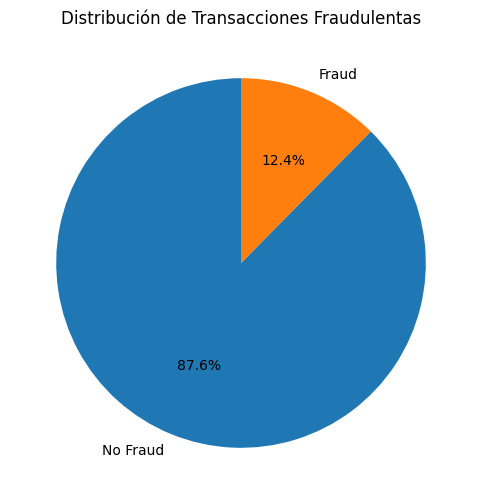

In [273]:
# Contar la cantidad de transacciones fraudulentas y no fraudulentas en df_train
fraud_counts = df_train['is_fraud'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()

In [274]:
# Contando cantidad de registros is_fraud en df_train
df_train['is_fraud'].value_counts()

,count
is_fraud,
0,10080
1,1426


In [276]:
# Separar la clase mayoritaria y la minoritaria
df_majority = df_train[df_train.is_fraud == 0]
df_minority = df_train[df_train.is_fraud == 1]

# Upsample minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # sample with replacement
                                 n_samples=len(df_majority),  # match number in majority class
                                 random_state=123)  # reproducible results

# Combinar la clase mayoritaria con la minoritaria upsampled
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Verificar la distribución de las clases
print(df_upsampled.is_fraud.value_counts())

df_balanceado = df_upsampled


is_fraud
0    10080
1    10080
Name: count, dtype: int64


In [277]:
df_balanceado.T

,11966,6649,12255,4089,3505,11096,14295,10249,5119,13063,...,1393,166,1071,1443,1753,527,742,846,700,1395
category,home,misc_net,entertainment,shopping_pos,grocery_net,shopping_net,kids_pets,home,health_fitness,health_fitness,...,home,shopping_pos,gas_transport,shopping_net,shopping_pos,grocery_pos,shopping_net,shopping_net,grocery_pos,food_dining
amt,15.0,109.96,10.43,5.71,39.7,1.43,15.83,20.66,23.11,34.24,...,264.64,671.44,11.15,979.57,799.3,306.14,1113.37,966.33,302.98,112.06
city,Moriarty,Burbank,Eugene,Redford,Arnold,Norwalk,Fields Landing,Parks,Sun City,Tomales,...,Altonah,Lamy,Carroll,Honokaa,Glendale,Cardwell,Fiddletown,Parks,Glendale,Altonah
state,New Mexico,Washington,Oregon,Missouri,Missouri,California,California,Arizona,California,California,...,Utah,New Mexico,Nebraska,Hawaii,California,Missouri,California,Arizona,California,Utah
lat,34.9889,46.1966,44.0385,37.3272,38.4305,33.9056,40.7268,35.2563,33.7467,38.2427,...,40.3207,35.4311,42.277,20.0827,34.1556,36.0434,38.5234,35.2563,34.1556,40.3207
long,-106.0609,-118.9017,-123.0614,-91.0243,-90.387,-118.0818,-124.2174,-111.95,-117.1721,-122.9145,...,-110.436,-105.9409,-97.1926,-155.488,-118.2322,-90.2907,-120.6763,-111.95,-118.2322,-110.436
city_pop,7268,3684,191096,241,35439,105549,276,759,54287,337,...,302,923,566,4878,172817,1120,832,759,172817,302
merch_lat,35.191886,45.563869,44.708545,36.85701,38.952935,34.351833,40.207219,36.19785,34.645096,38.845227,...,40.532013,36.411315,41.843552,20.184493,34.036573,36.624525,39.067556,35.970915,33.253266,41.111935
merch_long,-105.832554,-118.076592,-122.072096,-91.002408,-90.990324,-117.744959,-124.512417,-112.374533,-117.275318,-122.571733,...,-110.541338,-105.841668,-97.165502,-156.069084,-117.60762,-89.565808,-120.058197,-112.022555,-118.857299,-110.198219
age,31,39,55,46,35,46,90,62,48,65,...,30,55,45,54,38,62,32,62,78,30


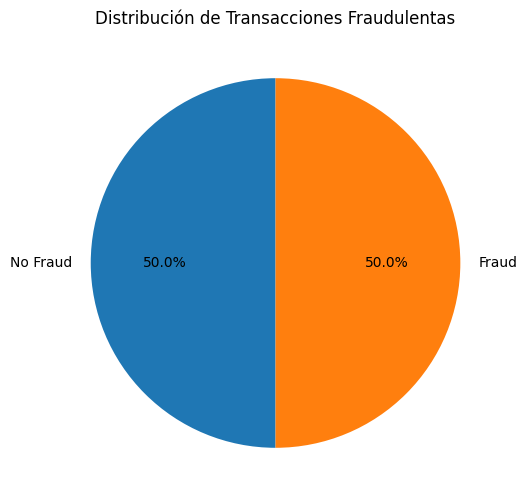

In [278]:
# Contar la cantidad de transacciones fraudulentas y no fraudulentas en df_balanceado del train

fraud_counts = df_balanceado['is_fraud'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()



In [285]:
# descarga el df_balanceado en un fichero .csv llamado train

df_balanceado.to_csv('train_balanceado.csv', index=False)
files.download('train_balanceado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [280]:
# actualiza X_train, y_train de f_balanceado

# Actualizar X_train y y_train con los datos balanceados de df_balanceado
X_train = df_balanceado.drop('is_fraud', axis=1)
y_train = df_balanceado['is_fraud']


In [281]:
# tamaño de xtrain balanceado
print(X_train.shape)

(20160, 17)


In [282]:
# tamaño de xtest
print(X_test.shape)

(2877, 17)


In [283]:
# tamaño de y_train
print(y_train.shape)

(20160,)


In [284]:
# tamaño de y_test
print(y_test.shape)

(2877,)
